In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
# import state tax panel
filename = "stateTaxes.xlsx"
state_taxes = pd.read_excel(filename, parse_dates = True)
state_taxes = state_taxes[state_taxes["State"] != 0.0]
tax_names = state_taxes.iloc[0]
state_taxes = state_taxes.iloc[1:]
state_taxes["Year"] = pd.to_datetime(state_taxes["Year"].astype(int), format = "%Y")
state_taxes["Name"] = state_taxes["Name"].str[:2]
tax_names = tax_names.iloc[4:]
state_taxes.rename(columns = {taxid:taxname for taxid, taxname in tax_names.items()}, inplace = True)
state_taxes = state_taxes.replace("X","0").replace("T0", "TX")
for key in tax_names:
    state_taxes[key] = state_taxes[key].astype(int)
state_taxes[state_taxes[tax_names]<0] = 0

state_taxes.set_index(["Name", "Year"], inplace = True)
state_taxes.tail()

State  FY Ending Date  Total Taxes  Property Tax (T01)  \
Name Year                                                                 
VA   1942-01-01   47.0         63042.0        65682                4884   
WA   1942-01-01   48.0         33142.0        90388                4618   
WV   1942-01-01   49.0         63042.0        56851                 196   
WI   1942-01-01   50.0         63042.0       110855               14421   
WY   1942-01-01   51.0         93041.0         7405                 514   

                 Tot Sales & Gr Rec Tax  Total Gen Sales Tax (T09)  \
Name Year                                                            
VA   1942-01-01                   35745                          0   
WA   1942-01-01                   73516                      40248   
WV   1942-01-01                   44763                      30961   
WI   1942-01-01                   36578                          0   
WY   1942-01-01                    5460                       2094   

                 Total Select Sales Tax  Alcoholic Beverage Tax (T10)  \
Name Year                                                               
VA   1942-01-01                   35745                          6552   
WA   1942-01-01                   33268                          2964   
WV   1942-01-01                   13802                           988   
WI   1942-01-01                   36578                          6715   
WY   1942-01-01                    3366                           329   

                 Amusement Tax (T11)  Insurance Premium Tax (T12)  ...  \
Name Year                                                          ...   
VA   1942-01-01                    0                         2133  ...   
WA   1942-01-01                    0                         1831  ...   
WV   1942-01-01                    0                         1039  ...   
WI   1942-01-01                    0                         2445  ...   
WY   1942-01-01                    0                          169  ...   

                 Occup and Bus Lic NEC (T28)  Other License Taxes (T29)  \
Name Year                                                                 
VA   1942-01-01                            0                       3831   
WA   1942-01-01                            0                       1393   
WV   1942-01-01                            0                        990   
WI   1942-01-01                            0                       1017   
WY   1942-01-01                            0                         99   

                 Total Income Taxes  Individual Income Tax (T40)  \
Name Year                                                          
VA   1942-01-01                9394                         3121   
WA   1942-01-01                   0                            0   
WV   1942-01-01                2474                         2474   
WI   1942-01-01               36700                        14004   
WY   1942-01-01                   0                            0   

                 Corp Net Income Tax (T41)  Total Other Taxes  \
Name Year                                                       
VA   1942-01-01                       6273               2096   
WA   1942-01-01                          0               3277   
WV   1942-01-01                          0               1196   
WI   1942-01-01                      22696               4132   
WY   1942-01-01                          0                 78   

                 Death and Gift Tax (T50)  Docum and Stock Tr Tax (T51)  \
Name Year                                                                 
VA   1942-01-01                       725                             0   
WA   1942-01-01                      3138                             0   
WV   1942-01-01                       516                             0   
WI   1942-01-01                      4059                             0   
WY   1942-01-01                        78                   

In [3]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
2021]
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

Alabama Alaska Arizona Arkansas California Colorado Connecticut Delaware  \
Abbr      AL     AK      AZ       AR         CA       CO          CT       DE   

     Florida Georgia  ... South Dakota Tennessee Texas Utah Vermont Virginia  \
Abbr      FL      GA  ...           SD        TN    TX   UT      VT       VA   

     Washington West Virginia Wisconsin Wyoming  
Abbr         WA            WV        WI      WY  

[1 rows x 50 columns]

In [4]:
import time
def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        time.sleep(.51)
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [5]:
pop_codes  = {state: f"{state}POP" for state in state_dict.values()}
med_home_price_codes = {state: f"MEDLISPRI{state}" for state in state_dict.values()}
index_home_price_codes = {state: f"{state}STHPI" for state in state_dict.values()}
state_gdp_codes = {state: f"{state}INFORGSP" for state in state_dict.values()}
codes = {"Population":pop_codes,
         # "Median Home Price":med_home_price_codes,
         "Home Price Index":index_home_price_codes,}
        # "GDP":state_gdp_codes}
panels = {}

# Select start and end dates
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.today()
# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
for name, code in codes.items():
    code_data = gather_data(data_codes = codes[name], start = start, end = end, freq = "A")
    panels[name] = code_data.reset_index()
    panels[name]["DATE"] = pd.to_datetime(panels[name]["DATE"].astype(str).str[:4].astype(int), format = "%Y")
    panels[name] = panels[name].melt(id_vars=["DATE"], 
            var_name="State", 
            value_name=name).set_index(["State", "DATE"]).round(2)
panels

{'Population':                   Population
 State DATE                  
 AL    1900-01-01     1830.00
       1901-01-01     1907.00
       1902-01-01     1935.00
       1903-01-01     1957.00
       1904-01-01     1978.00
 ...                      ...
 WY    2019-01-01      580.12
       2020-01-01      577.66
       2021-01-01      579.55
       2022-01-01      581.63
       2023-01-01      584.06
 
 [6200 rows x 1 columns],
 'Home Price Index':                   Home Price Index
 State DATE                        
 AL    1975-01-01             73.31
       1976-01-01             76.88
       1977-01-01             85.46
       1978-01-01             92.42
       1979-01-01            102.14
 ...                            ...
 WY    2020-01-01            340.92
       2021-01-01            380.47
       2022-01-01            438.83
       2023-01-01            459.80
       2024-01-01            470.42
 
 [2500 rows x 1 columns]}

In [6]:
storage_options = {'User-Agent': 'Mozilla/5.0'}
# url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
url = "https://www.fraserinstitute.org/sites/all/modules/custom/ftw_api_services/files/economic-freedom-north-america-2023-full-dataset.xlsx"
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
print(efw.keys())

dict_keys(['Index Components', 'Overall-scores(subn)', 'Overall-ranks(subn)rounded', 'Overall-scores(allgovs)', 'Overall-ranks(allgovs)', '1A-subn', '1B-subn', '1C-subn', '2A-subn', '2B-subn', '2C-subn', '2D-subn', '3Ai-subn', '3Aii-subn', '3Aiii-subn', '1A-allg ', '1B-allg', '1C-allg', '1D-allg', '2A-allg', '2B-allg', '2Bi-allg', '2Bii-allg', '2C-allg', '2D-allg', '3A-allg', '3Ai-allg', '3Aii-allg', '3Aiii-allg', '3Aiv-allg', '3B-allg', '3C-allg', '4-allg', '5-allg', '6-allg'])


In [7]:
# efw["Index Components"]

In [8]:
EFW_comp_data = {}
for efw_comp in ["Overall-scores(allgovs)", "3A-allg", "3B-allg", "3C-allg", "4-allg", "5-allg", "6-allg"]:
    index_name = list(efw[efw_comp].keys())[0]
    ecd= efw[efw_comp].copy()
    ecd.set_index(index_name, inplace = True)
    ecd.index.name = "State"
    ecd = ecd.loc[state_dict.keys()].reset_index()
    ecd["State"] = ecd["State"].apply(lambda x:state_dict[x])
    ecd.set_index("State", inplace = True)
    EFW_comp_data[efw_comp] = ecd.copy() 
EFW_comp_data["3-allg"] = (EFW_comp_data["3A-allg"] + EFW_comp_data["3B-allg"] + EFW_comp_data["3C-allg"]).div(3)

In [9]:
EFW_comp_data["Average 3-6"] = (EFW_comp_data["3-allg"] + EFW_comp_data["4-allg"] + EFW_comp_data["5-allg"] + EFW_comp_data["6-allg"]).div(4)
EFW_comp_data["Average 3-6"].tail()


1985  1990      1995      2000      2001      2002      2003      2004  \
State                                                                           
VA      NaN   NaN  8.925170  8.964584  8.837859  8.818259  8.760854  8.818253   
WA      NaN   NaN  8.860441  8.897585  8.764513  8.745360  8.683019  8.738758   
WV      NaN   NaN  8.862538  8.901996  8.774212  8.768338  8.706547  8.754208   
WI      NaN   NaN  8.880063  8.911551  8.788490  8.777087  8.718778  8.770699   
WY      NaN   NaN  8.898040  8.941048  8.817386  8.798699  8.746975  8.801180   

           2005      2006  ...      2012      2013      2014      2015  \
State                      ...                                           
VA     8.644518  8.654263  ...  8.449183  8.495844  8.469571  8.543243   
WA     8.560455  8.564131  ...  8.378222  8.427464  8.406739  8.484197   
WV     8.581483  8.584063  ...  8.394828  8.442890  8.424739  8.483547   
WI     8.592250  8.592867  ...  8.416264  8.463124  8.438810  8.527036   
WY     8.630193  8.636957  ...  8.445450  8.501265  8.472818  8.543320   

           2016      2017      2018      2019      2020      2021  
State                                                              
VA     8.584644  8.605956  8.479942  8.461103  8.253650  8.233555  
WA     8.521323  8.525272  8.395386  8.366343  8.167446  8.164604  
WV     8.514084  8.541944  8.422345  8.402834  8.196641  8.200697  
WI     8.566138  8.587204  8.462551  8.441229  8.229830  8.233665  
WY     8.580607  8.603945  8.475048  8.449764  8.238549  8.241616  

[5 rows x 25 columns]

# create panel with efw table

In [10]:
efwpanel = EFW_comp_data["Overall-scores(allgovs)"]
efwpanel = efwpanel[years]
efwpanel = efwpanel.reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name="EFNA")
efwpanel["Year"] = pd.to_datetime(efwpanel["Year"],format = "%Y")
efwpanel = efwpanel.set_index(["State", "Year"]).round(2)
efwpanel

EFNA
State Year            
AL    1985-01-01  8.22
AK    1985-01-01  8.04
AZ    1985-01-01  8.25
AR    1985-01-01  8.20
CA    1985-01-01  8.07
...                ...
VA    2021-01-01  7.94
WA    2021-01-01  7.93
WV    2021-01-01  7.92
WI    2021-01-01  7.95
WY    2021-01-01  7.99

[1250 rows x 1 columns]

In [11]:
for key, df in EFW_comp_data.items():
    df_panel = df.reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name=key)
    df_panel = df_panel[df_panel["Year"].isin(years)]
    df_panel["Year"] = pd.to_datetime(df_panel["Year"],format = "%Y")
    efwpanel[key] = df_panel.set_index(["State", "Year"])[key]
efwpanel

EFNA Overall-scores(allgovs)   3A-allg   3B-allg   3C-allg  \
State Year                                                                     
AL    1985-01-01  8.22                8.222328  5.896394  9.466133       NaN   
AK    1985-01-01  8.04                8.044158  5.854095  9.466133       NaN   
AZ    1985-01-01  8.25                8.251662  6.630779  9.466133       NaN   
AR    1985-01-01  8.20                8.203501  6.156647  9.466133       NaN   
CA    1985-01-01  8.07                8.065614  6.220263  9.466133       NaN   
...                ...                     ...       ...       ...       ...   
VA    2021-01-01  7.94                7.940446  8.714474  7.410669  6.756226   
WA    2021-01-01  7.93                7.931351  7.887069  7.410669  6.756226   
WV    2021-01-01  7.92                7.921989  8.320177  7.410669  6.756226   
WI    2021-01-01  7.95                7.949852  8.715795  7.410669  6.756226   
WY    2021-01-01  7.99                7.988226  8.811210  7.410669  6.756226   

                    4-allg    5-allg    6-allg    3-allg  Average 3-6  
State Year                                                             
AL    1985-01-01  8.640242  9.339362  9.257778       NaN          NaN  
AK    1985-01-01  8.640242  9.339362  9.257778       NaN          NaN  
AZ    1985-01-01  8.640242  9.339362  9.257778       NaN          NaN  
AR    1985-01-01  8.640242  9.339362  9.257778       NaN          NaN  
CA    1985-01-01  8.640242  9.339362  9.257778       NaN          NaN  
...                    ...       ...       ...       ...          ...  
VA    2021-01-01  7.859447  9.379773  8.067876  7.627123     8.233555  
WA    2021-01-01  7.859447  9.379773  8.067876  7.351322     8.164604  
WV    2021-01-01  7.859447  9.379773  8.067876  7.495691     8.200697  
WI    2021-01-01  7.859447  9.379773  8.067876  7.627564     8.233665  
WY    2021-01-01  7.859447  9.379773  8.067876  7.659369     8.241616  

[1250 rows x 10 columns]

# Next, reintegrate GDP data from BEA, this is superior

In [12]:
# Gathered from SAGDP2N Gross domestic product (GDP) by state 1
# Gross domestic product (GDP) by state: All industry total (Millions of current dollars)
# https://apps.bea.gov/iTable/?reqid=70&step=30&isuri=1&year_end=-1&acrdn=1&classification=naics&state=0&yearbegin=-1&unit_of_measure=levels&major_area=0&area=00000,09000,17000,42000,48000,53000&year=2019&tableid=505&category=1505&area_type=0&statistic=1,11#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbInRhYmxlaWQiLCI1MDUiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWyJYWCJdXSxbIlN0YXRpc3RpYyIsWyIxIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWxzIl0sWyJZZWFyIixbIi0xIl1dLFsiWWVhckJlZ2luIiwiLTEiXSxbIlllYXJfRW5kIiwiLTEiXV19

GDP = pd.read_csv("StateGDP.csv")#.rename(columns = {year:datetime.datetime(int(year),1,1) for year in GDP.keys()[8:]})
GDP_years = list(GDP.keys())[-24:]
GDP = GDP[GDP["GeoName"].isin(state_names)]
GDP["State"] = GDP["GeoName"].apply(lambda x: state_dict[x])
GDP = GDP[["State","LineCode"] + GDP_years]
GDP = GDP.melt(id_vars=["State", "LineCode"], 
        var_name="Year", 
        value_name="GDP")
GDP["Year"] = pd.to_datetime(GDP["Year"], format = "%Y")
GDP.set_index(["State", "Year"], inplace = True)
GDP

LineCode       GDP
State Year                          
AL    1997-01-01       1.0  104716.9
      1997-01-01       2.0   87489.8
      1997-01-01       3.0    1771.3
      1997-01-01       4.0    1365.4
      1997-01-01       5.0     405.9
...                    ...       ...
WY    2020-01-01      88.0    3680.1
      2020-01-01      89.0    4531.8
      2020-01-01      90.0    2740.2
      2020-01-01      91.0    9071.9
      2020-01-01      92.0   20565.4

[110400 rows x 2 columns]

In [13]:
panel = panels["Population"].copy()
panel["Home Price Index"] = panels["Home Price Index"]
for name in panels.keys():
    panel[name] = panels[name]
for name in efwpanel.keys():
    panel[name] = efwpanel[name]
panel.loc["AL"].loc["1990":]

Population  Home Price Index  EFNA Overall-scores(allgovs)  \
DATE                                                                     
1990-01-01     4048.51            146.55  8.54                 8.54309   
1991-01-01     4091.02            151.21   NaN                     NaN   
1992-01-01     4139.27            157.22   NaN                     NaN   
1993-01-01     4193.11            163.94   NaN                     NaN   
1994-01-01     4232.96            169.92   NaN                     NaN   
1995-01-01     4262.73            176.75  8.48                8.477837   
1996-01-01     4290.40            183.88   NaN                     NaN   
1997-01-01     4320.28            190.80   NaN                     NaN   
1998-01-01     4351.04            200.49   NaN                     NaN   
1999-01-01     4369.86            205.71   NaN                     NaN   
2000-01-01     4452.17            210.84  8.53                8.532111   
2001-01-01     4467.63            222.48  8.39                8.388647   
2002-01-01     4480.09            229.00  8.40                8.398525   
2003-01-01     4503.49            238.11  8.42                8.422865   
2004-01-01     4530.73            247.20  8.48                 8.47674   
2005-01-01     4569.80            264.64  8.36                8.356287   
2006-01-01     4628.98            285.56  8.35                8.352071   
2007-01-01     4672.84            299.05  8.35                8.353734   
2008-01-01     4718.21            302.41  8.20                 8.19876   
2009-01-01     4757.94            298.06  7.91                 7.90872   
2010-01-01     4785.51            286.85  8.01                 8.01333   
2011-01-01     4799.64            277.20  8.01                8.006858   
2012-01-01     4816.63            275.70  8.10                8.099702   
2013-01-01     4831.59            273.71  8.03                8.027414   
2014-01-01     4843.74            276.86  8.06                8.063544   
2015-01-01     4854.80            284.45  8.12                 8.12113   
2016-01-01     4866.82            292.67  8.14                8.137822   
2017-01-01     4877.99            301.43  8.16                8.163116   
2018-01-01     4891.63            313.70  8.11                8.114453   
2019-01-01     4907.96            329.40  8.09                8.094852   
2020-01-01     5031.86            348.53  7.96                  7.9624   
2021-01-01     5050.38            393.86  7.97                7.971285   
2022-01-01     5073.90            459.46   NaN                     NaN   
2023-01-01     5108.47            491.71   NaN                     NaN   

             3A-allg   3B-allg   3C-allg    4-allg    5-allg    6-allg  \
DATE                                                                     
1990-01-01  6.781583  9.642976       NaN  8.459271  9.669886  9.075556   
1991-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1992-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1993-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1994-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1995-01-01  6.983214  9.596263  8.472028  8.589237  9.788098  8.805833   
1996-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1997-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1998-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1999-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-01  7.412481  9.811253  8.345653  8.774783  9.607645  8.805980   
2001-01-01  7.467220  9.991158  7.223048  8.616561  9.612013  8.733509   
2002-01-01  8.501484  9.458878  7.282003  8.371206  9.724411  8.631370   
2003-01-01  8.377560  9.210160  7.165337  8.258308  9.743610  8.672555   
2004-01-01  8.400907  9.282631  7.837200  8.140071  9.753565  8.714559   
2005-01-01  8.380573  9.428217  7.642381  7.938339  9.704182  8.290545   
2006-01-01  8.4

In [14]:
gdp_cats={1:"GDP",
          2:"Private GDP",
          82:"Government Spending",
          86:"State and Local Spending"}
for id, cat in gdp_cats.items():
    panel.loc[panel.index.isin(GDP.index),cat] = GDP["GDP"][GDP["LineCode"]==id].astype(float)


In [15]:
tax_panel = state_taxes.copy()
for name, val in tax_panel.items():
    if name != "State":
        panel[name] = val
panel["GDP Per Capita"] = panel["GDP"].div(panel["Population"])

In [16]:
total_taxes_index = tax_names[tax_names == "Total Taxes"].name
tax_names = list(tax_names)
del tax_names[total_taxes_index]

In [17]:
growth_vars = ["GDP", "Population", "GDP Per Capita", "Home Price Index", "Private GDP", "Government Spending", 
               "State and Local Spending", "Total Income Taxes", "Total Taxes"]
efw_ix = ["EFNA", "Average 3-6"]
# nontax_names = [name for name in pct_state_taxes.keys() if name not in tax_names.values]
pct_panel= panel.copy()
pct_panel[tax_names] = panel[tax_names].apply(lambda x: x.div(panel["Total Taxes"]))
pct_panel["Total Taxes"] = panel["Total Taxes"]
pct_panel[growth_vars] = np.log(panel[growth_vars]).groupby("State").diff()
pct_panel[efw_ix] = panel[efw_ix]


/home/jamescaton/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [18]:
pct_panel_5year = pct_panel.copy()
pct_panel_5year[growth_vars] = np.log(panel[growth_vars]).groupby("State").diff(5)
pct_panel[efw_ix] = panel[efw_ix]
pct_panel_5year.dropna()


/home/jamescaton/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Population  Home Price Index  EFNA Overall-scores(allgovs)  \
State DATE                                                                     
AL    2002-01-01    0.036323          0.182496  8.40                8.398525   
      2003-01-01    0.034438          0.171968  8.42                8.422865   
      2004-01-01    0.036152          0.183730  8.48                 8.47674   
      2005-01-01    0.026078          0.227271  8.36                8.356287   
      2006-01-01    0.035478          0.249615  8.35                8.352071   
...                      ...               ...   ...                     ...   
WI    2016-01-01    0.012077          0.075457  8.08                 8.08478   
      2017-01-01    0.012564          0.131910  8.13                8.133799   
      2018-01-01    0.012351          0.186686  8.11                8.109414   
      2019-01-01    0.012331          0.219971  8.06                8.060924   
      2020-01-01    0.022947          0.230874  7.94                7.935229   

                   3A-allg   3B-allg   3C-allg    4-allg    5-allg    6-allg  \
State DATE                                                                     
AL    2002-01-01  8.501484  9.458878  7.282003  8.371206  9.724411  8.631370   
      2003-01-01  8.377560  9.210160  7.165337  8.258308  9.743610  8.672555   
      2004-01-01  8.400907  9.282631  7.837200  8.140071  9.753565  8.714559   
      2005-01-01  8.380573  9.428217  7.642381  7.938339  9.704182  8.290545   
      2006-01-01  8.487535  9.623860  7.805509  7.874700  9.650058  8.306128   
...                    ...       ...       ...       ...       ...       ...   
WI    2016-01-01  8.578037  9.333835  8.388963  7.793423  9.814898  7.889288   
      2017-01-01  8.613778  9.333835  8.608196  7.802985  9.772471  7.921425   
      2018-01-01  8.564762  9.069233  8.308502  7.646651  9.772646  7.783407   
      2019-01-01  8.555981  8.987214  8.084057  7.644438  9.748029  7.830032   
      2020-01-01  8.563627  7.312681  8.039567  7.555009  9.626843  7.765508   

                  ...  Other License Taxes (T29)  Total Income Taxes  \
State DATE        ...                                                  
AL    2002-01-01  ...               1.997000e-06            0.206524   
      2003-01-01  ...               9.351109e-07            0.111619   
      2004-01-01  ...               9.974008e-07            0.169394   
      2005-01-01  ...               1.286315e-07            0.237101   
      2006-01-01  ...               0.000000e+00            0.231006   
...               ...                        ...                 ...   
WI    2016-01-01  ...               7.439318e-05            0.151841   
      2017-01-01  ...               3.164003e-04            0.128544   
      2018-01-01  ...               3.348209e-04            0.112444   
      2019-01-01  ...               2.456429e-03            0.258149   
      2020-01-01  ...               2.375453e-03            0.218472   

                  Individual Income Tax (T40)  Corp Net Income Tax (T41)  \
State DATE                                                                 
AL    2002-01-01                     0.311946                   0.049562   
      2003-01-01                     0.317242                   0.037780   
      2004-01-01                     0.319672                   0.041613   
      2005-01-01                     0.326276                   0.051106   
      2006-01-01                     0.324308                   0.065509   
...                                       ...                        ...   
WI    2016-01-01                     0.424187                   0.055910   
      2017-01-01                     0.429615                   0.052910   
      2018-01-01                     0.440098                   0.049143   
      2019-01-01                     0.440816                   0.065658   
      2020-01-01                     0.421141                   0.078583   

          

In [19]:
# log_levels do not calculate fraction of total tax for tax components
reduced_tax_names = [ "Property Tax (T01)"]#, "Individual Income Tax (T40)","Corp Net Income Tax (T41)"]
log_levels = np.log(panel[growth_vars + reduced_tax_names]).replace([np.inf, -np.inf], np.nan)
log_levels[efw_ix] = panel[efw_ix]


/home/jamescaton/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


# Notes concerning regressions:

## Keep in mind that rates use either 1) logged differences of levels, 2) for variables that are already percentages or fixed range indices (like EFNA), variables are not transformed, and 3) tax components are transformed to the percentage of total taxes. 

## For differences, the entire dataframe is differenced. Time for rates and for differences are the same (1 year rates are differenced over 1 year, 5 year rates are differenced over 5 years. 

### The regression suggests that a change in the proportional contribution of taxes impacts the rate of growth of taxes controlling for the rate of growth of GDP. Controlling for home prices implies that property tax income changes due to a policy change rather than changes in home values.

### We drop categories 1 and 2 from EFW as these reflect changes in taxing and spending

### Since we control for total taxes, changes in spending reflect changes relative to current tax levels

### For 5 year rates and differences, using year fixed effects is theoretically incorrect. As long as we do not use lags, there is no problem. 

### Within and between r^2 does not make sense when no fixed effects are included. Check this, compare to pooledOLS results (I would expect these to be identical...)


In [20]:
import copy 
pct_tax_dfs = {"Levels":panel, 
       "Log": log_levels,
       "Rates":pct_panel,
       "5YearRates": pct_panel_5year,
       "DiffRates":pct_panel.groupby("State").diff().dropna()[growth_vars +efw_ix + reduced_tax_names],
       "5YearDiffRates":pct_panel_5year.groupby("State").diff(5).dropna()[growth_vars + efw_ix + reduced_tax_names],
      }

# 

ef_level_log_diff = copy.copy(pct_tax_dfs)
ef_level_log_diff["Rates"] = ef_level_log_diff["Log"].groupby("State").diff()
ef_level_log_diff["Rates"][efw_ix] = panel[efw_ix]
ef_level_log_diff["5YearRates"] = ef_level_log_diff["Log"].groupby("State").diff(5)
ef_level_log_diff["DiffRates"] = ef_level_log_diff["Rates"].groupby("State").diff()
ef_level_log_diff["5YearDiffRates"] = ef_level_log_diff["5YearRates"].groupby("State").diff(5)
dfs_dct = {"Percent of Total Taxes":pct_tax_dfs, 
           "Match EF Level and Log Diff Taxes":ef_level_log_diff}



In [21]:
# for name, df in dfs.items():
#     for income_tax in ("Individual Income Tax (T40)", "Corp Net Income Tax (T41)", "Total Taxes", "GDP", "Population", "GDP Per Capita", "EFW"):
#         fig, ax = plt.subplots(figsize = (15,15))
#         x = "Property Tax (T01)"
#         df.plot.scatter(x = x, y = income_tax, ax = ax)
#         corrstr = df[[x, income_tax]].corr().round(2).loc[x, income_tax].astype(str)
#         ax.set_title(f"{name} Corr: {corrstr}")

In [22]:
import pingouin
import matplotlib.pyplot as plt

def plot_scatter_corr(plot_df, title, corr="corr", **kwargs):
    corr_df = getattr(plot_df, corr)().round(2)
    num_keys = len(plot_df.keys())
    fig, axs = plt.subplots(num_keys, num_keys, figsize=(20,20))
    
    for i, key1 in enumerate(plot_df.keys()):
        for j, key2 in enumerate(plot_df.keys()):
            
            if i < j:
                ax = axs[j][i]
                plot_df.plot.scatter(x=key1, y=key2, ax=ax, **kwargs)
                # Remove color bar label if 'c' is in kwargs
                if 'c' in kwargs:
                    cbar = ax.collections[0].colorbar
                    if cbar is not None:
                        cbar.set_label('')
                        cbar.set_ticklabels([])
            elif i > j:
                ax = axs[j][i]
                ax.text(.5, .5, corr_df.astype(str).loc[key2, key1],
                        ha="center", va="center", fontsize=28)
                ax.set_xticklabels([])
            else:
                ax = axs[i][j]
                plot_df[[key1]].hist(density=True, ax=ax)
                if i == 0: ax.set_ylabel(key1)
            
            if i > 0:
                ax.set_ylabel("")
                ax.set_yticklabels([])
            else:
                ax.set_ylabel(key2.replace(" ", "\n"), fontsize=24)
            if j < num_keys - 1: 
                ax.set_xticklabels([])
            if j > 0:
                ax.set_title("")
            else:
                ax.set_title(key1.replace(" ", "\n"), fontsize=24)
            ax.set_xlabel("")
    
    plt.suptitle(title, fontsize=40, y=1.025)
    return fig, ax



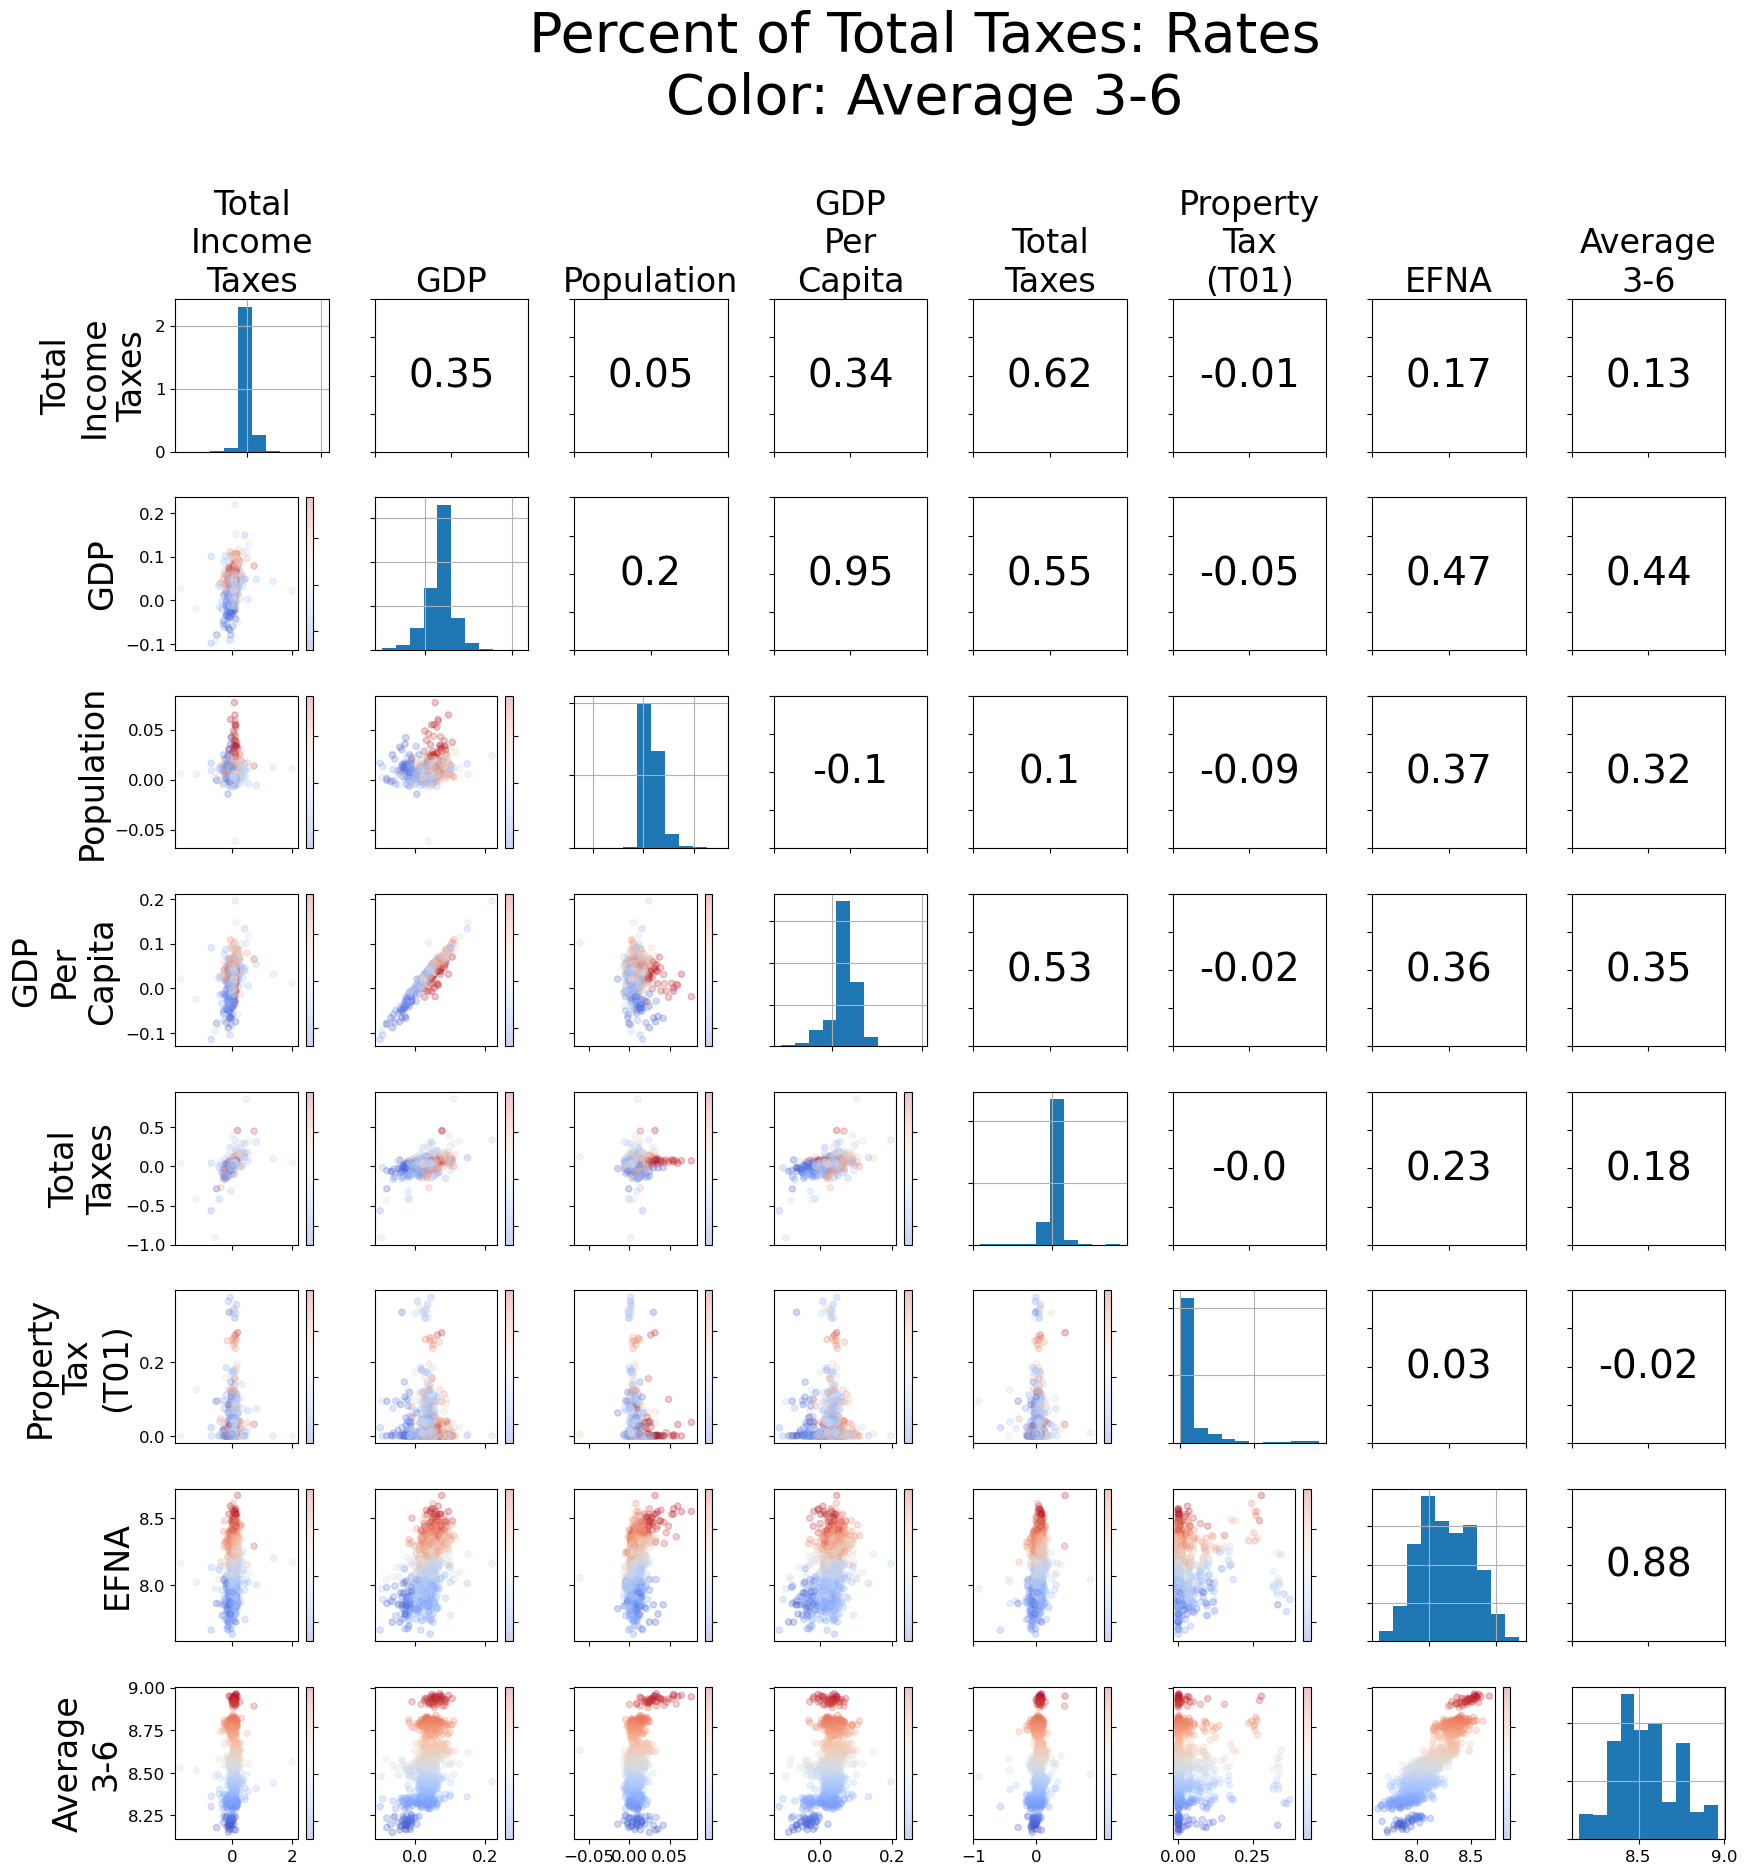

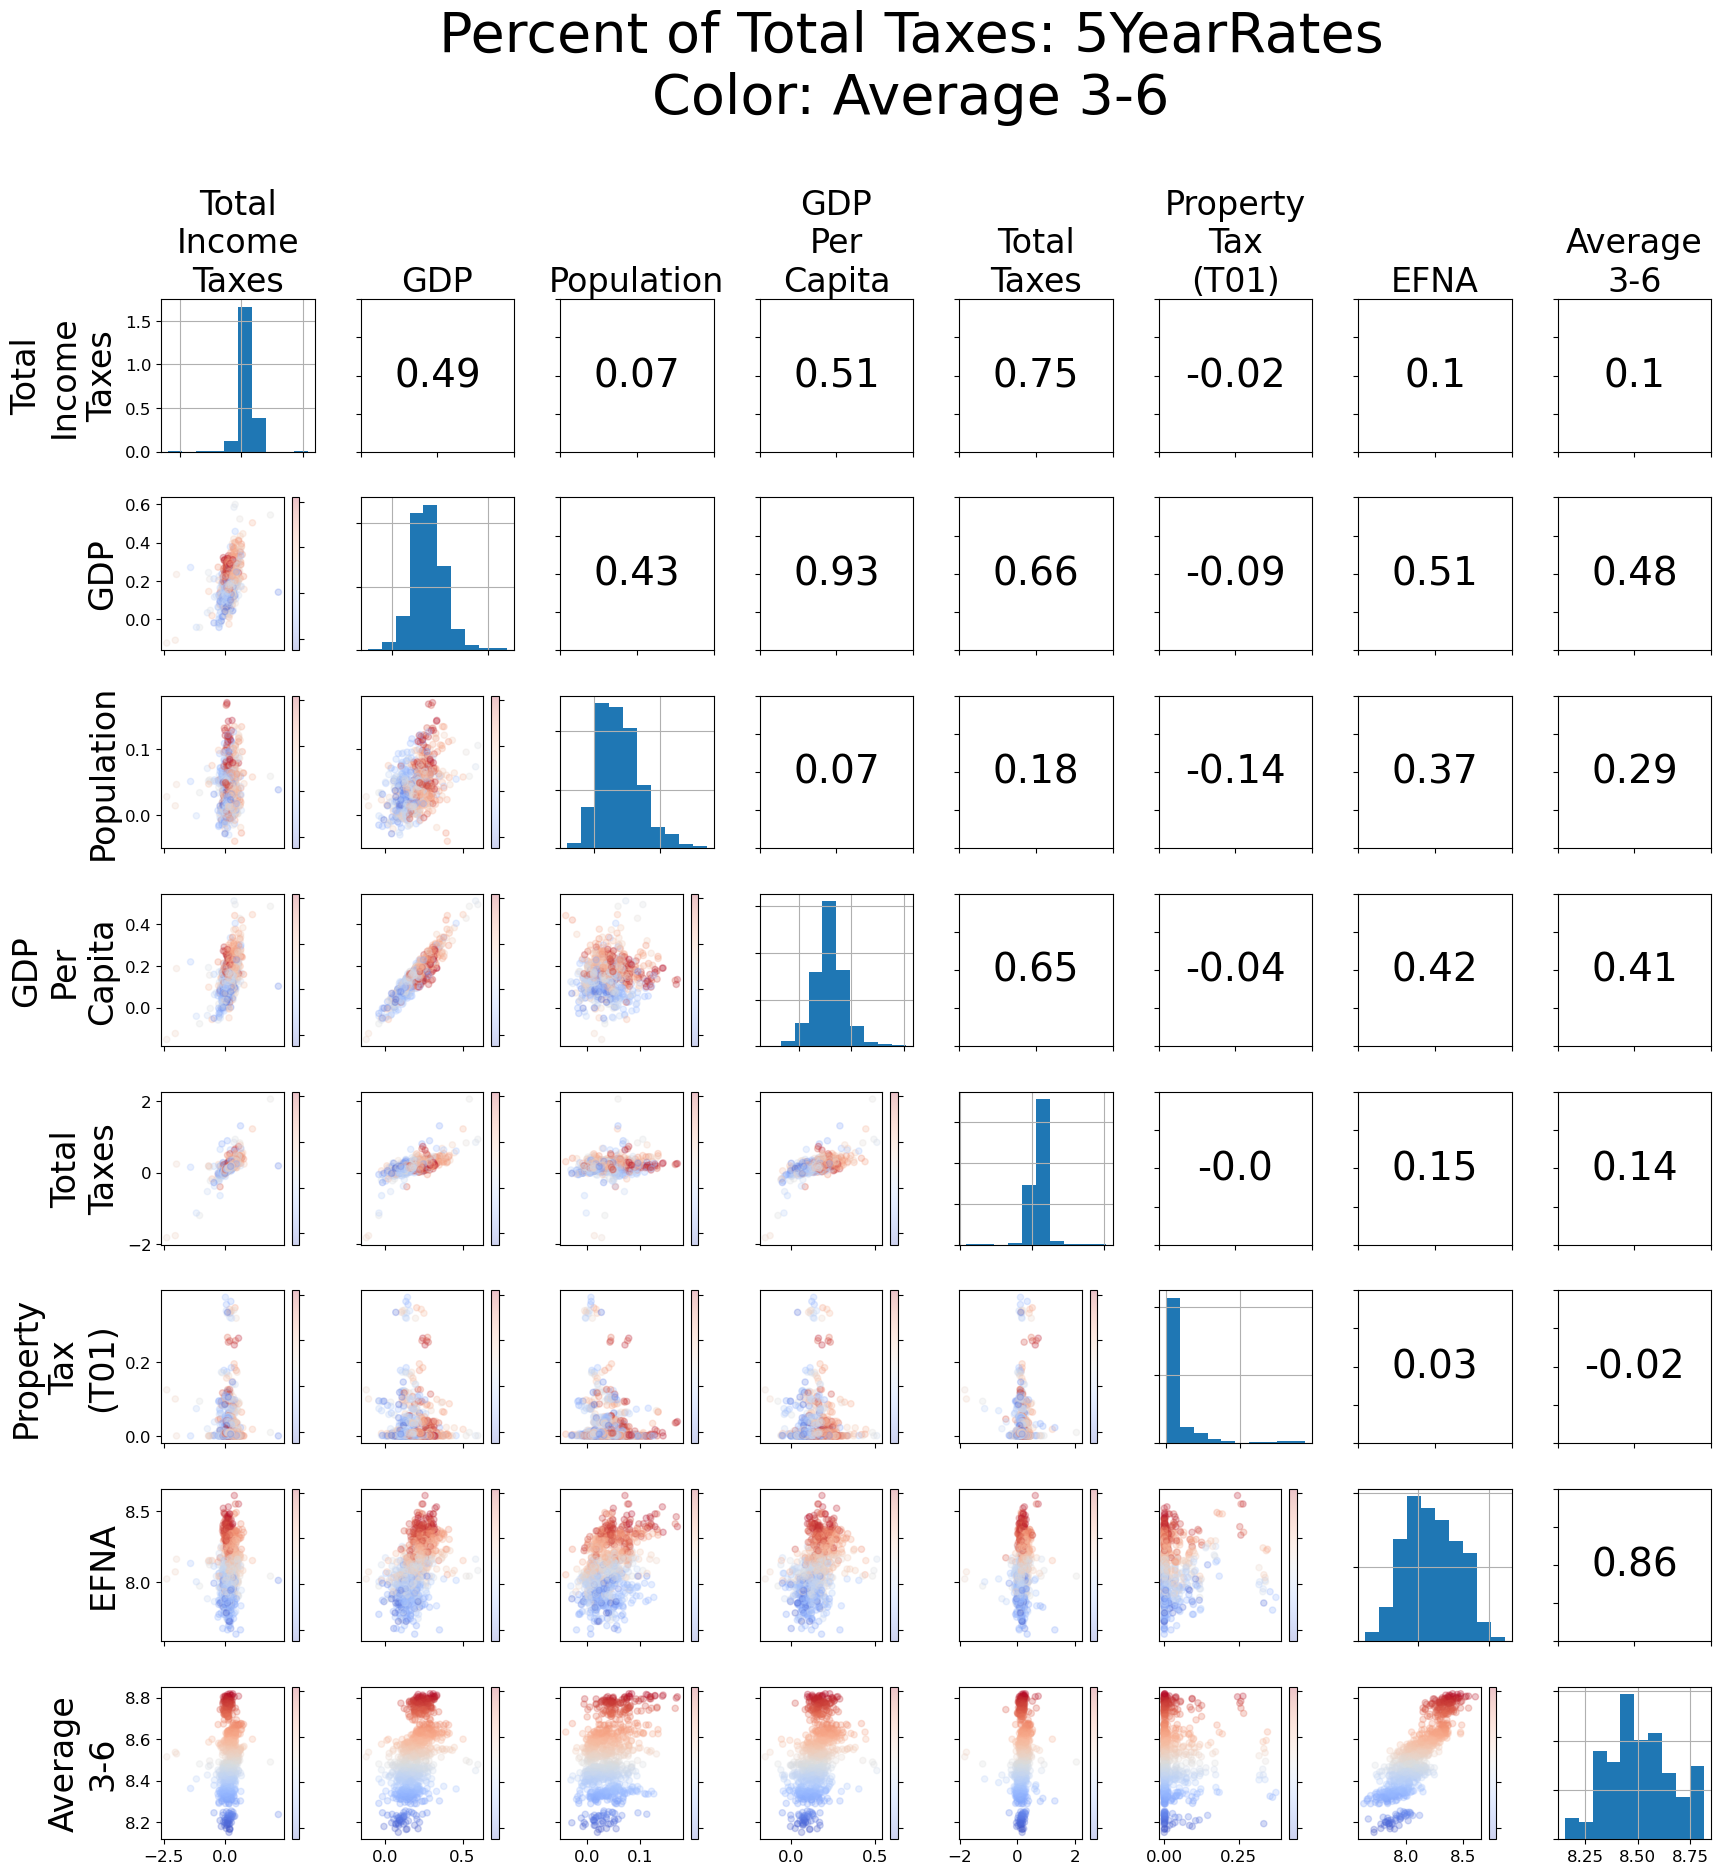

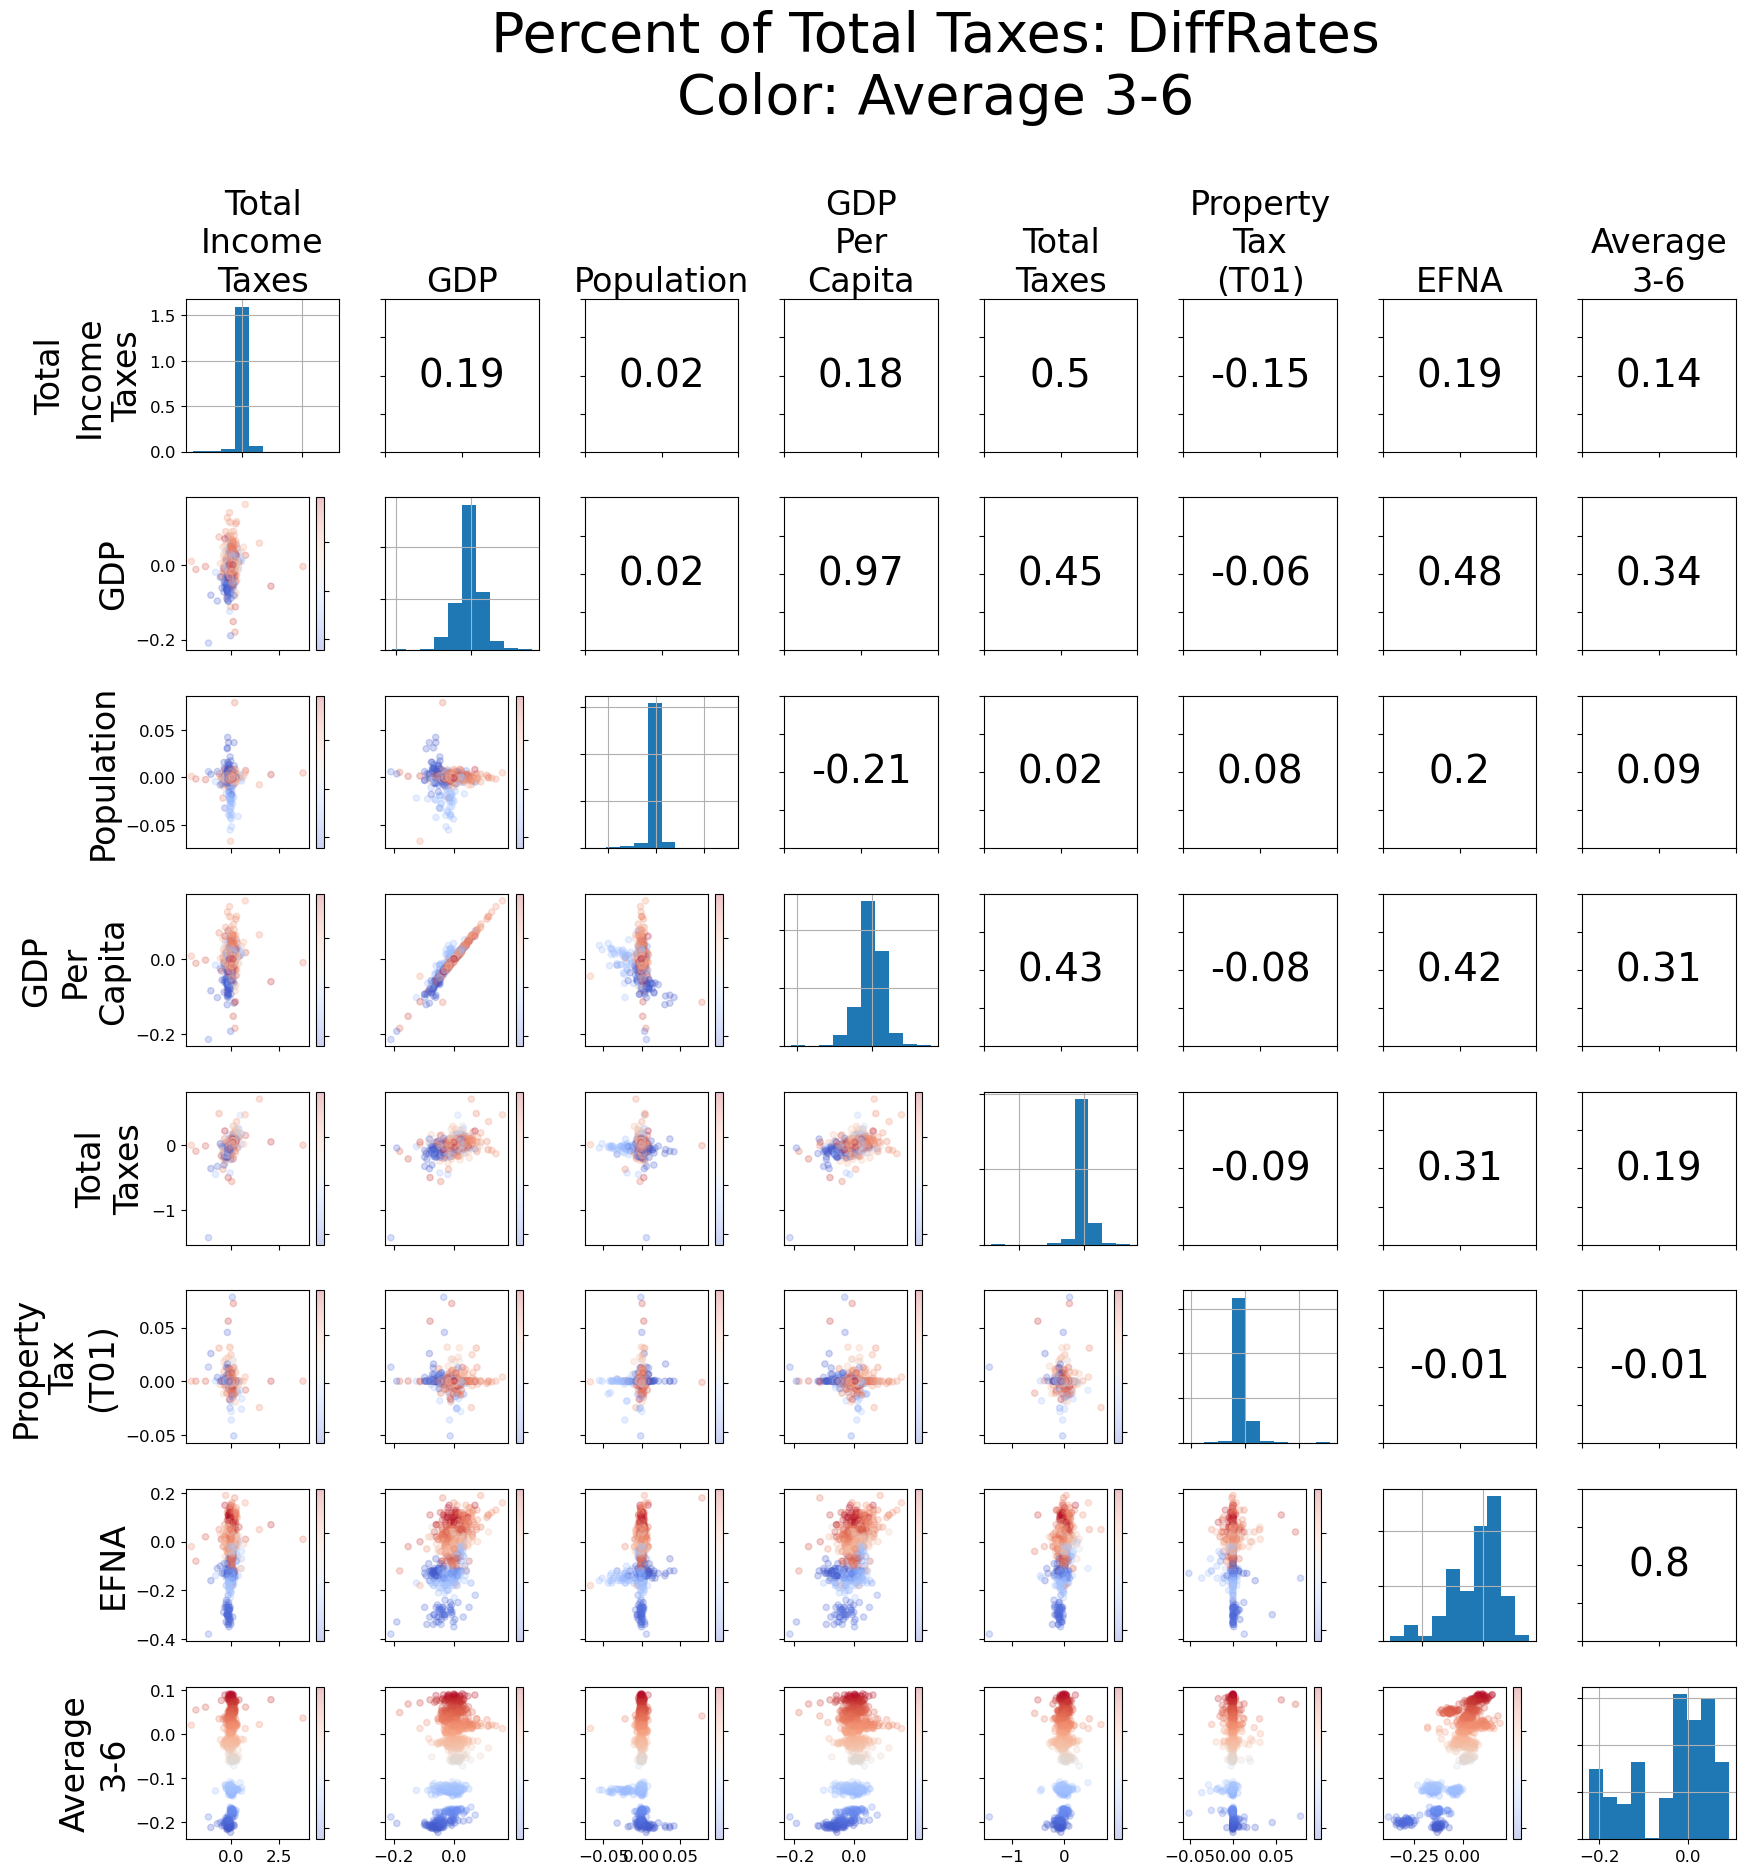

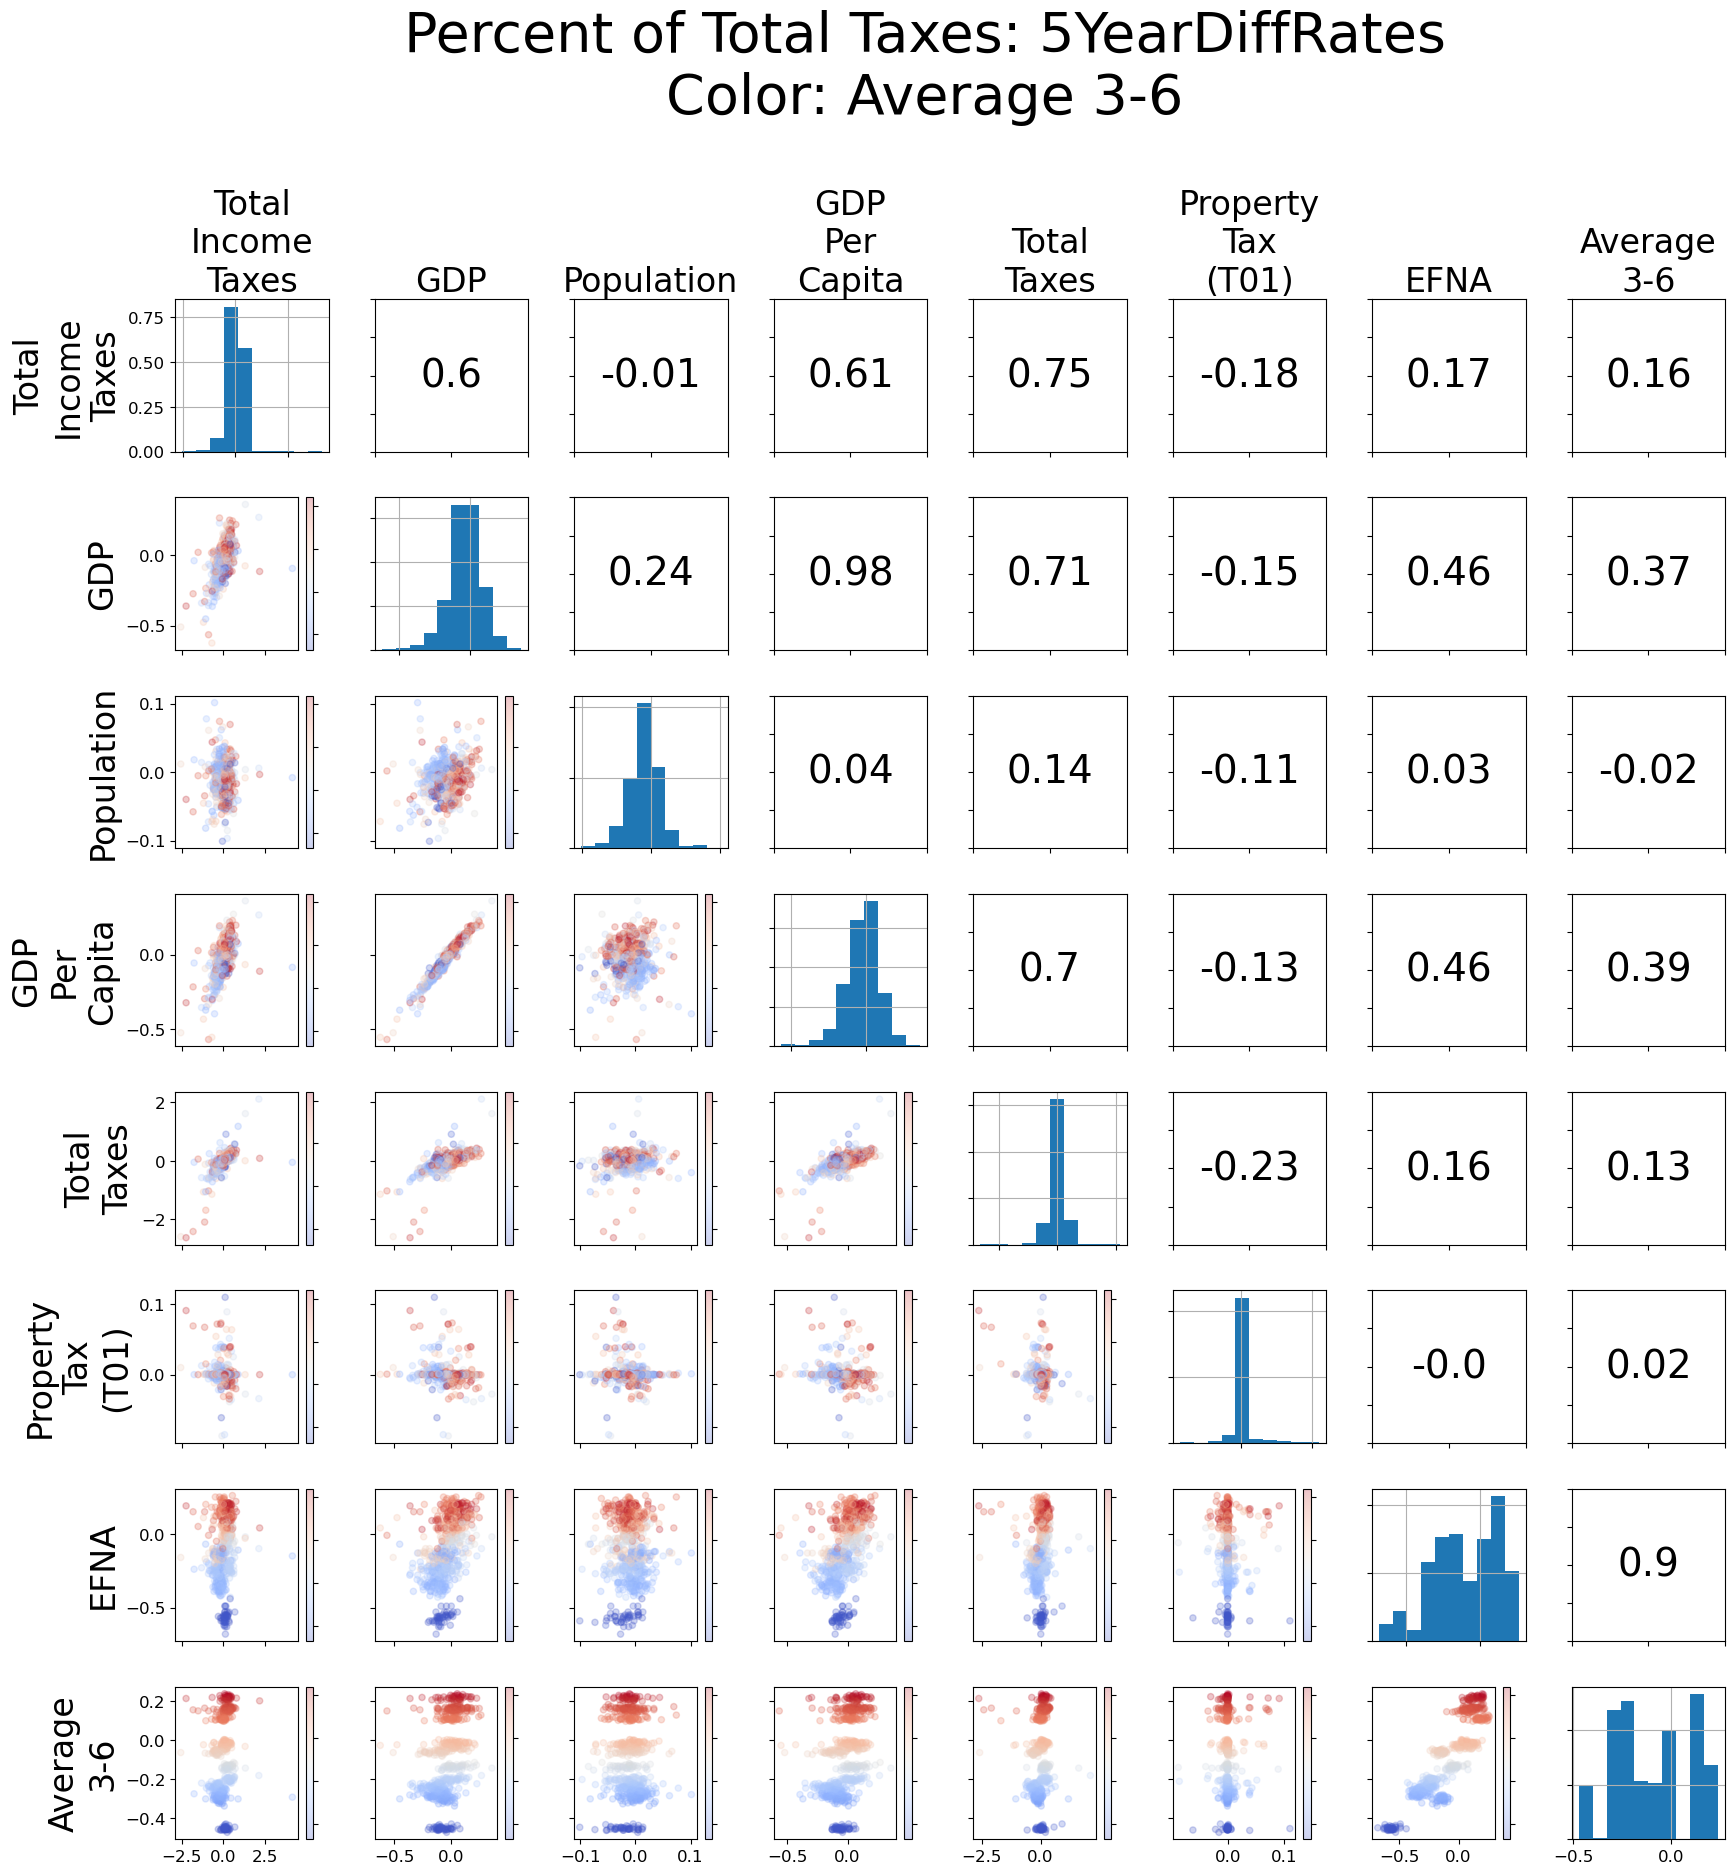

In [23]:
plt.rcParams.update({'font.size': 12})
colors = ["EFNA", "Average 3-6"]
plot_keys = ["Total Income Taxes", "GDP", "Population", "GDP Per Capita",
             "Total Taxes", "Property Tax (T01)", 
         #    "Individual Income Tax (T40)", "Corp Net Income Tax (T41)"
            ] + colors

# Example usage
for variant, dct in list(dfs_dct.items())[:1]: 
    for name, df in list(dct.items())[2:]:
    # possible to include tax component levels instead of component by percent of total taxes; 
    #  results of logged components in the least not meaningful without level info
        c ="Average 3-6"
        plot_df = df[plot_keys].dropna()
        fig, ax = plot_scatter_corr(plot_df.dropna(), f"{variant}: {name}\nColor: {c}", corr="corr", alpha =.25, cmap = "coolwarm", c = c)

In [24]:
class info_criterion():
    ## Thank you Abi Idowu
    # Function to calculate AIC
    def calculate_aic(self, n, rss, k):
        return n * np.log(rss / n) + 2 * k
    
    # Function to calculate BIC
    def calculate_bic(self, n, rss, k):
        return n * np.log(rss / n) + k * np.log(n)
    
    # Function to calculate HQIC
    def calculate_hqic(self, n, rss, k):
        return n * np.log(rss / n) + 2 * k * np.log(np.log(n))

## Run panel regressions with all combinations of fixed effects, including null set

In [25]:
from linearmodels import PanelOLS
from linearmodels.panel import compare
plt.rcParams.update({'font.size': 32})
# Function to get model summary using PanelOLS

def compare_regs_plot(compare_regs,y, variant="", title =""):
    title = f"y = {y}" if title == "" else title
    hlines = {"params":[0],
              "tstats":[0],
              "pvalues":[0.05, 0.1]}
    fig, axs = plt.subplots(2, 1, figsize = (20,6))
    stat_names = ("params", "pvalues")
    for i, stat in enumerate(stat_names):
        ax = axs[i]
        getattr(compare_regs, stat).plot.bar(ax = axs[i], legend = False)
        ax.set_ylabel(stat.title())
        
        if i == 0:
            ax.legend(loc = 1, ncols = 4, bbox_to_anchor = (.85,1.43), fontsize = 18)
        if i < len(stat_names) - 1:
            ax.set_xticklabels([])
            ax.set_xlabel("")
        else:
            ax.set_xticklabels([x.replace(" ", "\n") for x in compare_regs.params.index], rotation = "horizontal", fontsize = 20)

        for yval in hlines[stat]:
            ax.axhline(y = yval, ls = "--", 
                       linewidth = 2, color = "k")

        plt.suptitle(f"{variant}: {title}", y = 1.2)
def plot_r2(r2_df, r2s, key, variant):
    num_plots = 3
    fig, axs = plt.subplots(num_plots, 1, figsize = (20,10))
    for n, r2 in enumerate(r2s):
        ax = axs[n]
        plot_df = r2_df[r2_df["r2"] == r2]
        plot_df.plot(x = "y", y = list(r2_df.keys())[2:], kind = "bar", legend = False, ax = ax)
        if n == 0: 
            ax.legend(loc = 1, ncols = 4, bbox_to_anchor = (.85,1.4), fontsize = 18)        
        if n + 1 == num_plots: 
            ax.set_xticklabels([x for x in ax.get_xticklabels()], rotation = "horizontal", fontsize = 20)
        else:
            ax.set_xticklabels([])
            ax.set_xlabel("")

        ax.set_ylabel(r2.replace("_", "\n").title(), fontsize = 20)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
        plt.suptitle(f"{variant}: {key}\n$r^2$ Measures", y = 1.09)
        ax.axhline(0, color = "k", ls = "-", linewidth = 2)
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Percent of Total Taxes: Rates
 Total Taxes
                                      Model Comparison                                      
                               Entity:False,   Entity:False,    Entity:True,    Entity:True,
                                  Time:False       Time:True      Time:False       Time:True
--------------------------------------------------------------------------------------------
Dep. Variable                    Total Taxes     Total Taxes     Total Taxes     Total Taxes
Estimator                           PanelOLS        PanelOLS        PanelOLS        PanelOLS
No. Observations                        1050            1050            1050            1050
Cov. Est.                          Clustered       Clustered       Clustered       Clustered
R-squared                             0.3051          0.1766          0.3107          0.1774
R-Squared (Within)                    0.3054          0.2953          0.3107          0.2158
R-Squared (Between)        

/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)


Percent of Total Taxes: 5YearRates
 Total Taxes
                                      Model Comparison                                      
                               Entity:False,   Entity:False,    Entity:True,    Entity:True,
                                  Time:False       Time:True      Time:False       Time:True
--------------------------------------------------------------------------------------------
Dep. Variable                    Total Taxes     Total Taxes     Total Taxes     Total Taxes
Estimator                           PanelOLS        PanelOLS        PanelOLS        PanelOLS
No. Observations                         950             950             950             950
Cov. Est.                          Clustered       Clustered       Clustered       Clustered
R-squared                             0.4973          0.4290          0.5239          0.4554
R-Squared (Within)                    0.5107          0.4857          0.5239          0.5204
R-Squared (Between)   

/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)


Percent of Total Taxes: DiffRates
 Total Taxes
                                      Model Comparison                                      
                               Entity:False,   Entity:False,    Entity:True,    Entity:True,
                                  Time:False       Time:True      Time:False       Time:True
--------------------------------------------------------------------------------------------
Dep. Variable                    Total Taxes     Total Taxes     Total Taxes     Total Taxes
Estimator                           PanelOLS        PanelOLS        PanelOLS        PanelOLS
No. Observations                         920             920             920             920
Cov. Est.                          Clustered       Clustered       Clustered       Clustered
R-squared                             0.2130          0.1021          0.2117          0.1021
R-Squared (Within)                    0.2116          0.0884          0.2117          0.0861
R-Squared (Between)    

/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)


Percent of Total Taxes: 5YearDiffRates
 Total Taxes
                                      Model Comparison                                      
                               Entity:False,   Entity:False,    Entity:True,    Entity:True,
                                  Time:False       Time:True      Time:False       Time:True
--------------------------------------------------------------------------------------------
Dep. Variable                    Total Taxes     Total Taxes     Total Taxes     Total Taxes
Estimator                           PanelOLS        PanelOLS        PanelOLS        PanelOLS
No. Observations                         644             644             644             644
Cov. Est.                          Clustered       Clustered       Clustered       Clustered
R-squared                             0.5392          0.4527          0.5463          0.4545
R-Squared (Within)                    0.5446         -0.7867          0.5463         -1.3416
R-Squared (Between

/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)
/tmp/ipykernel_13351/1178301682.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 14)


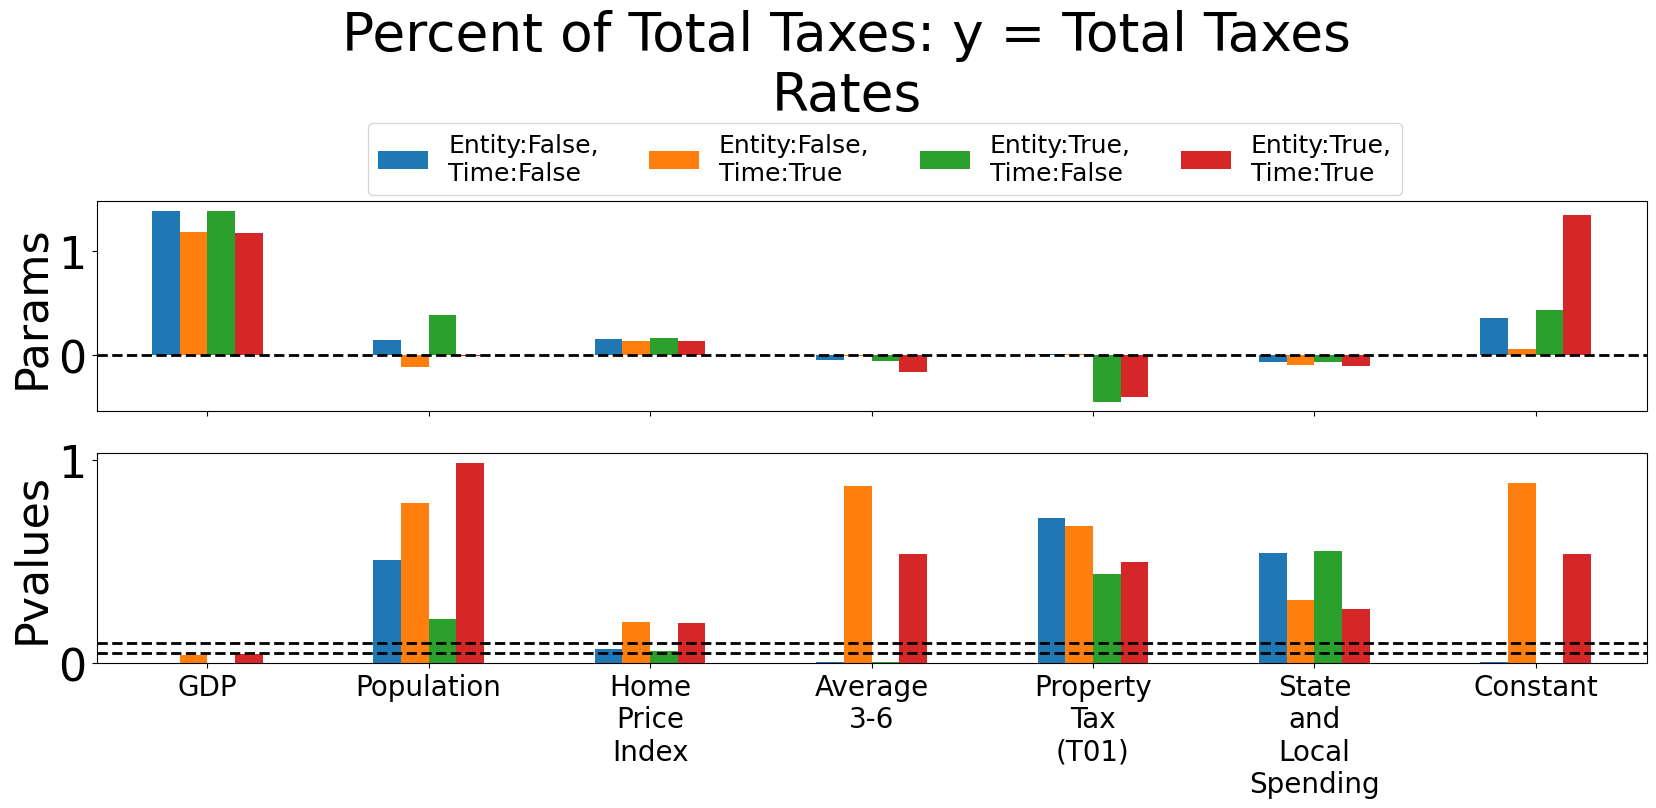

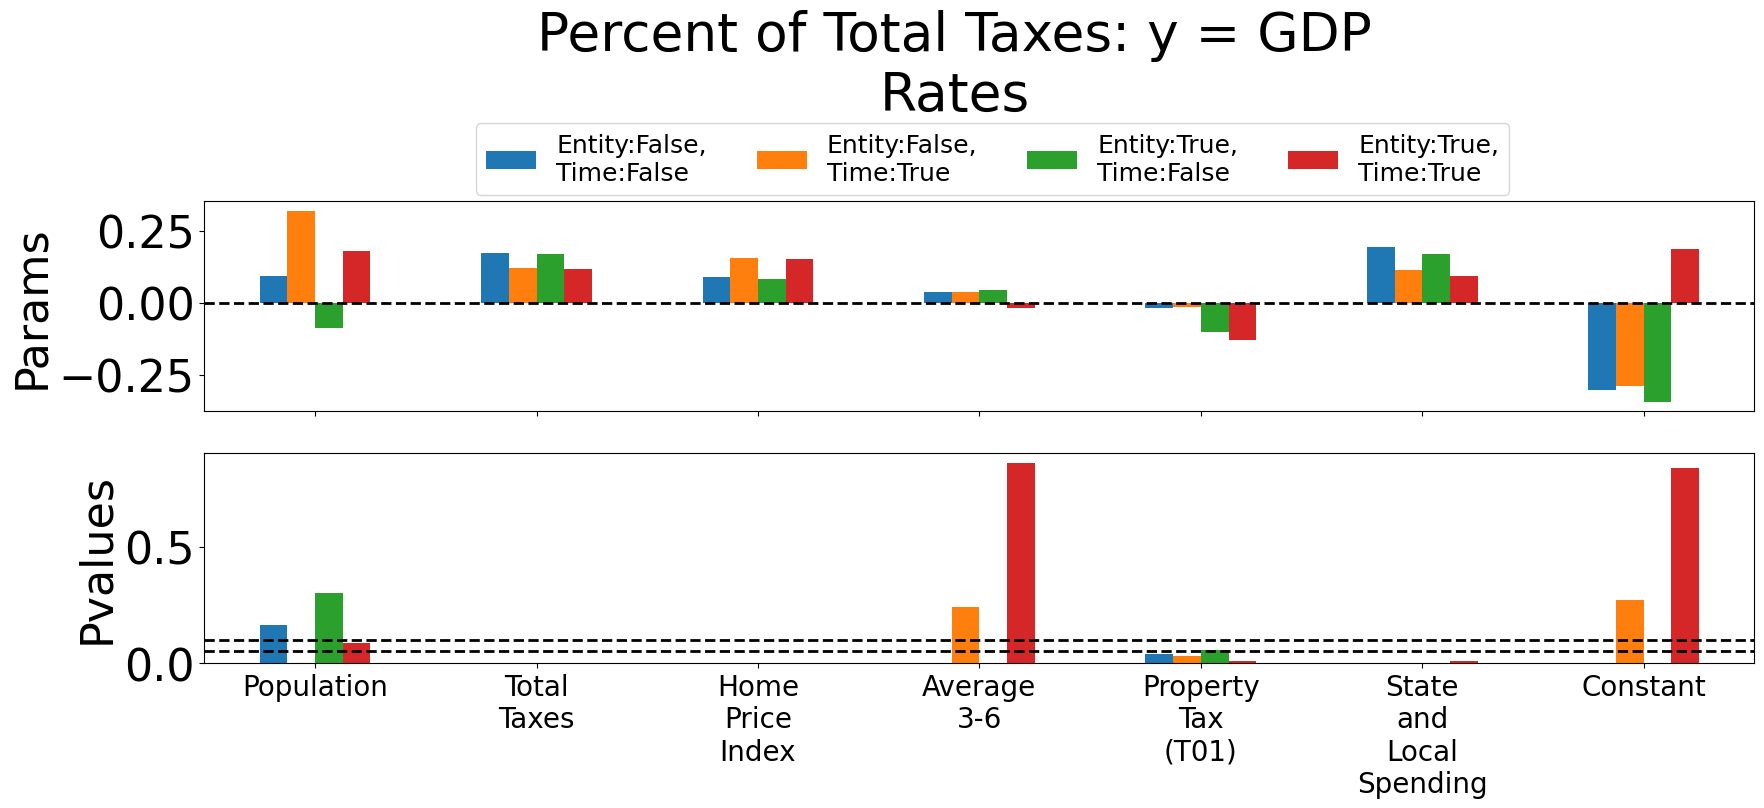

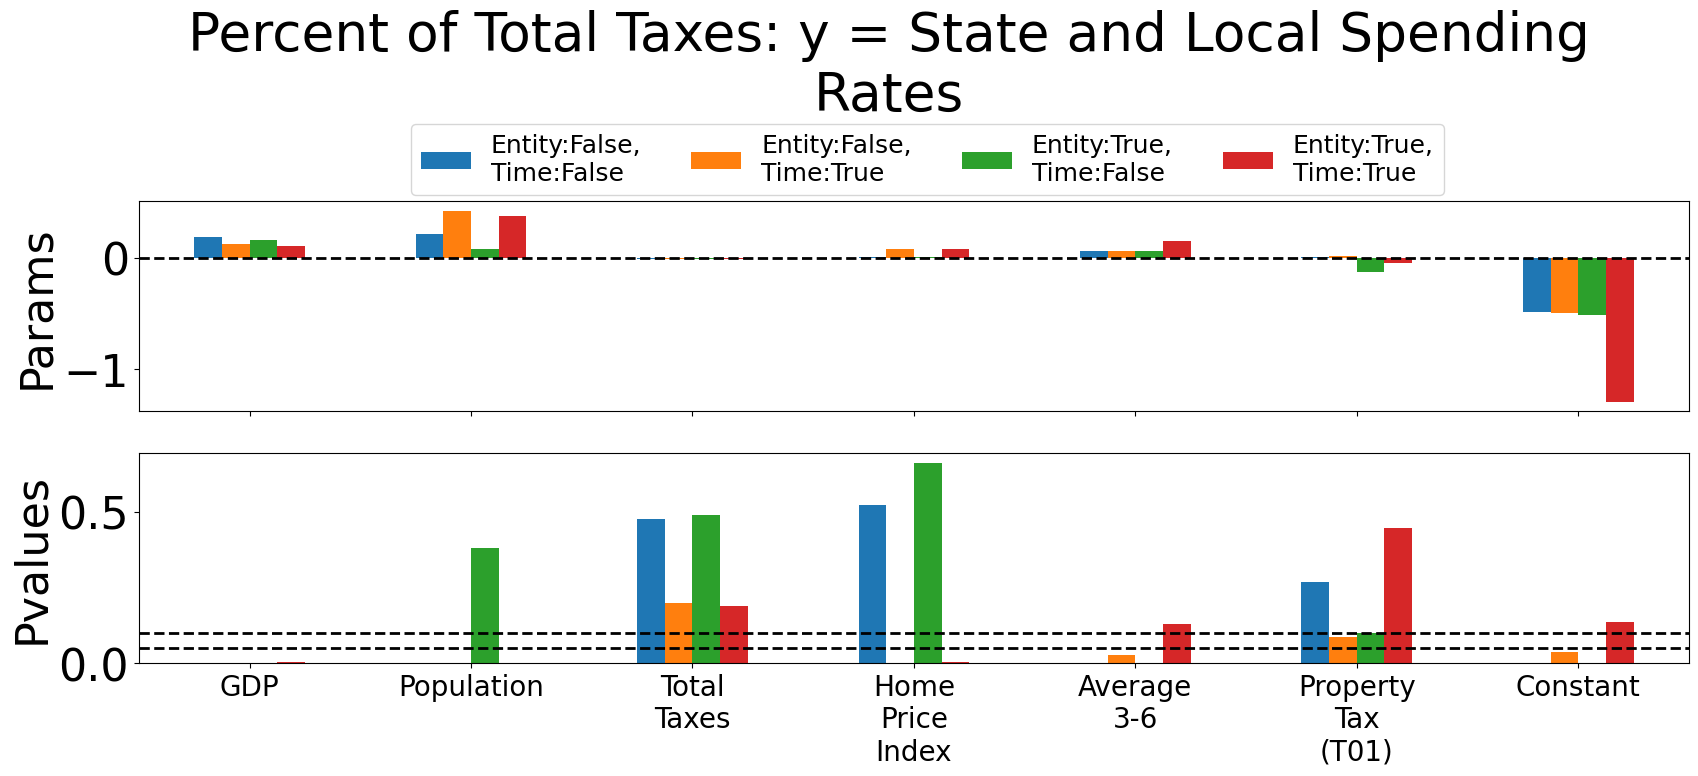

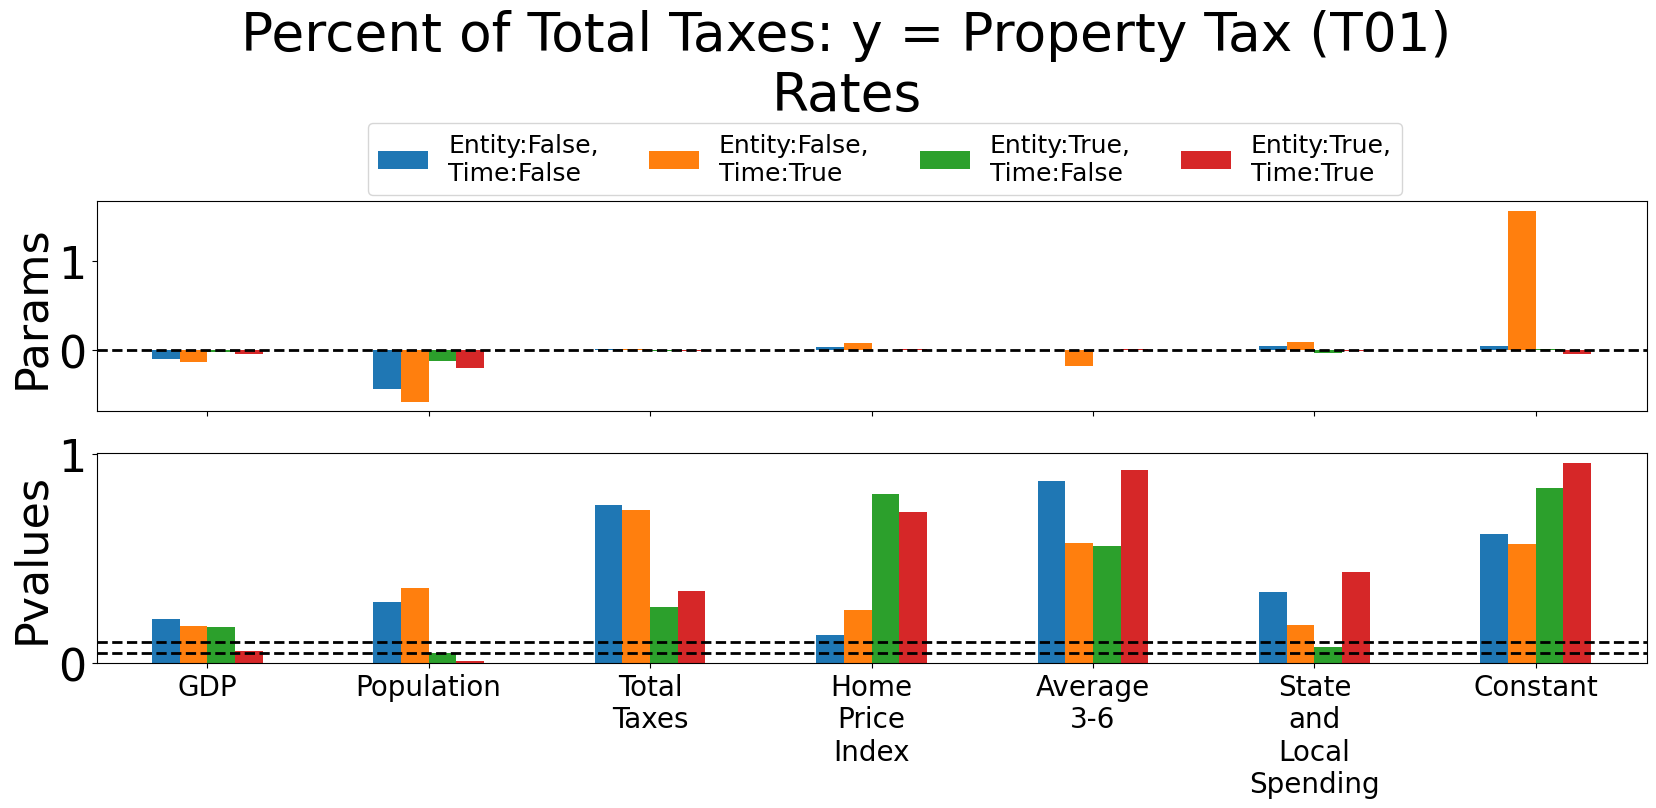

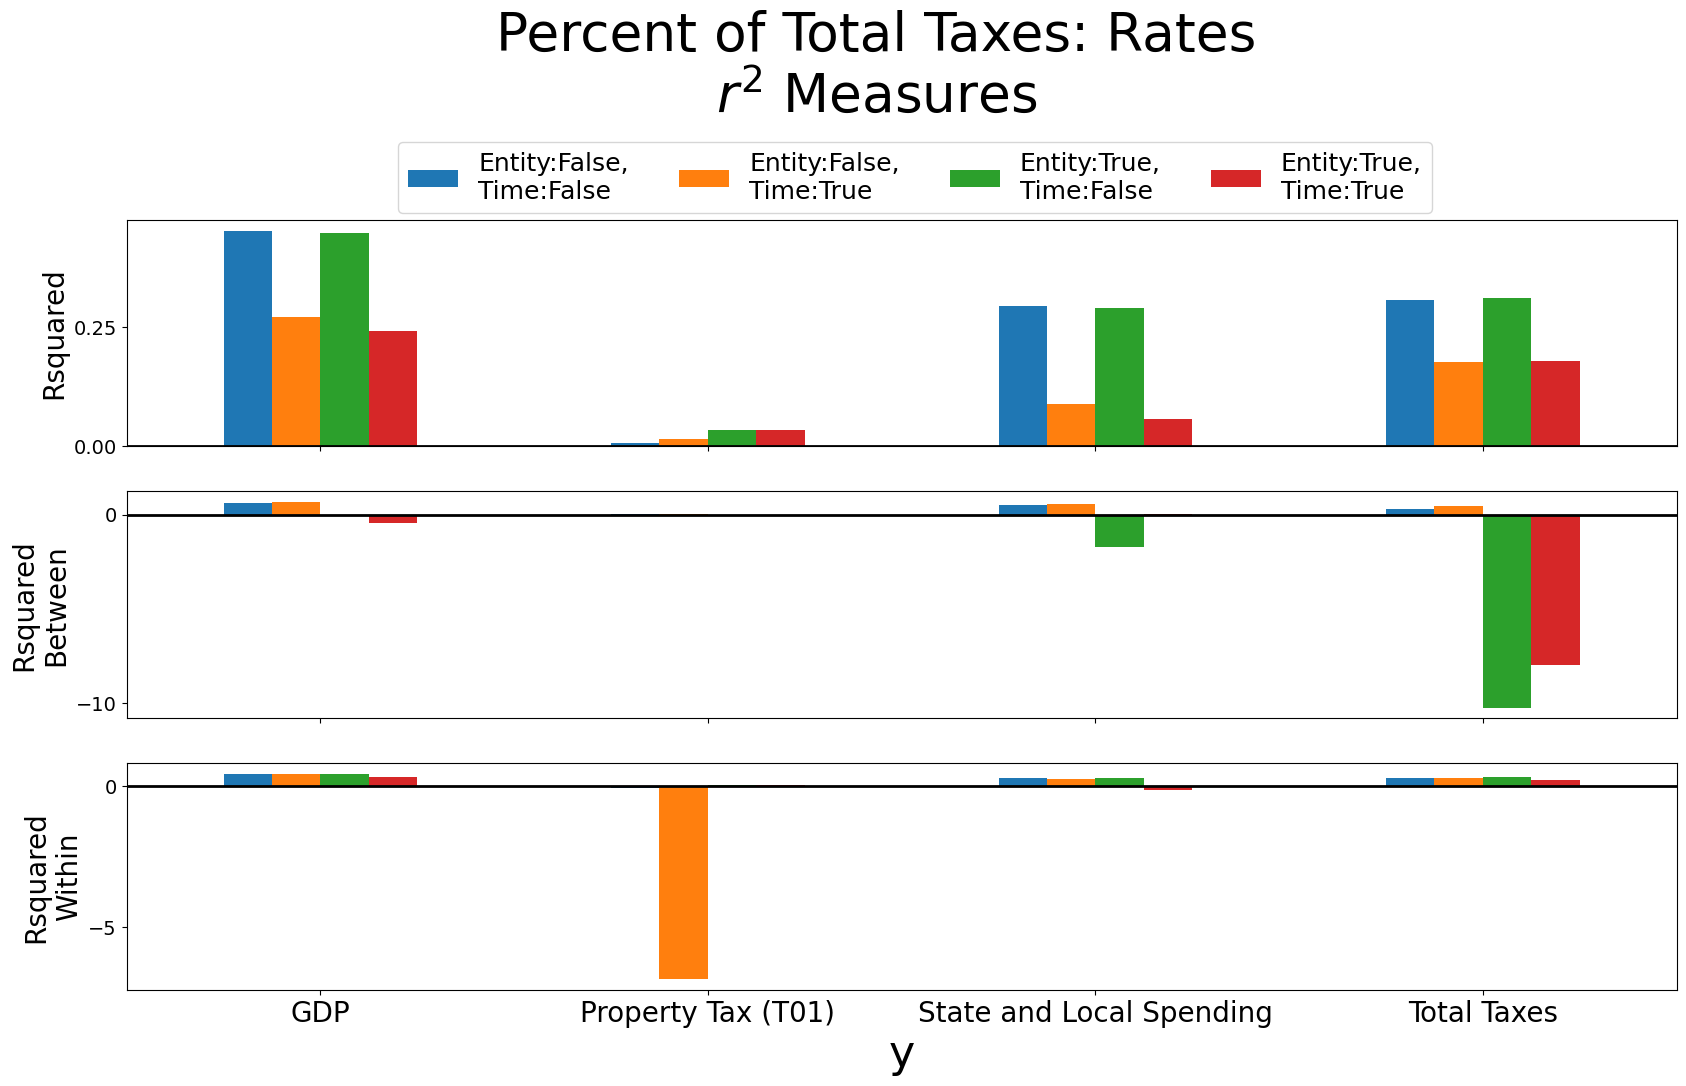

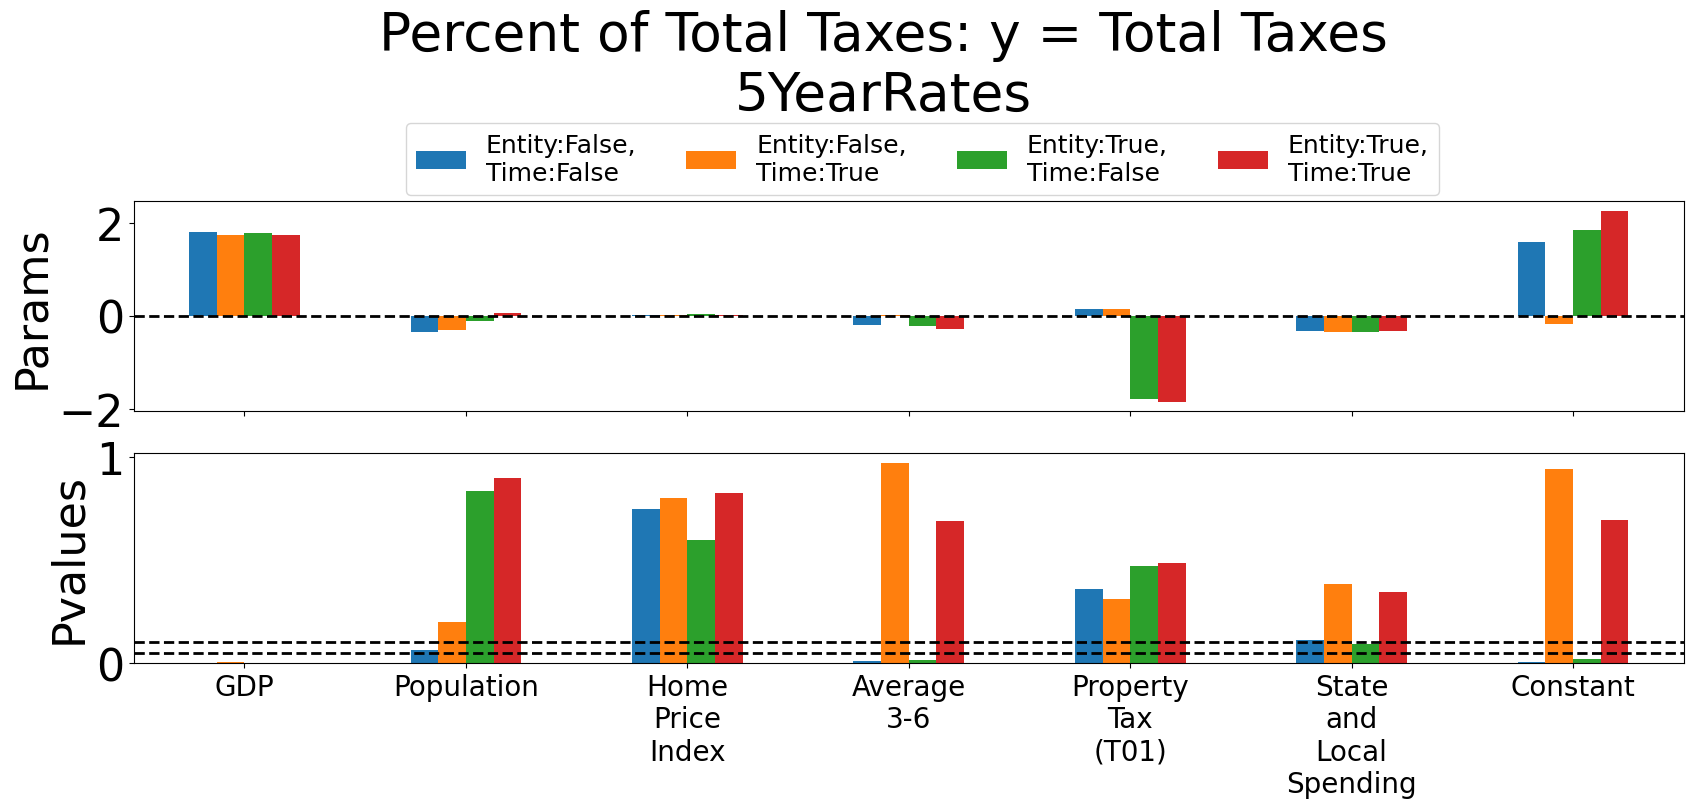

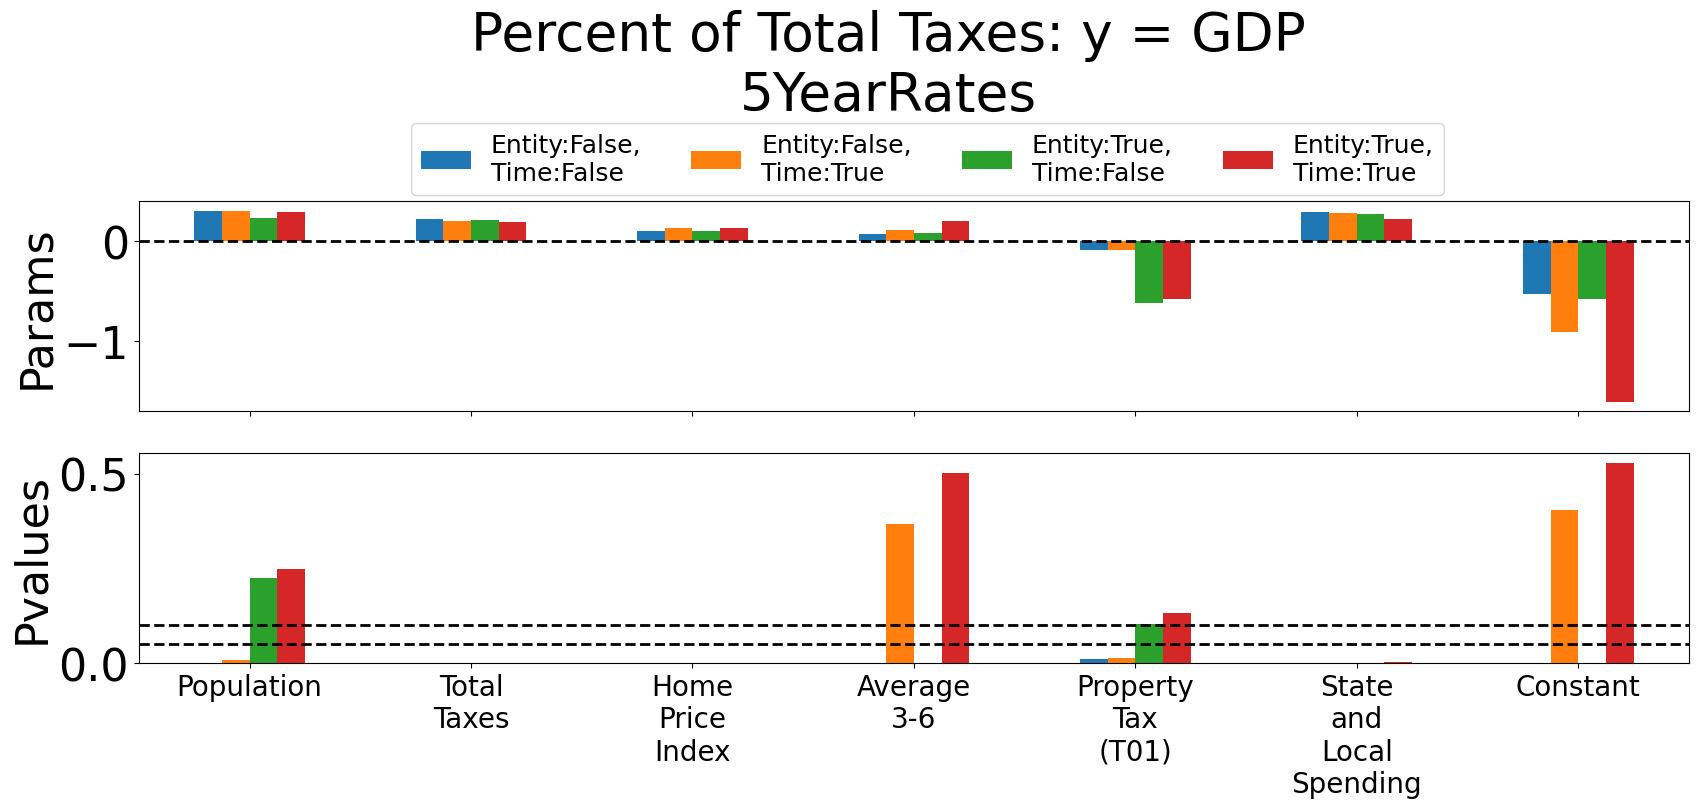

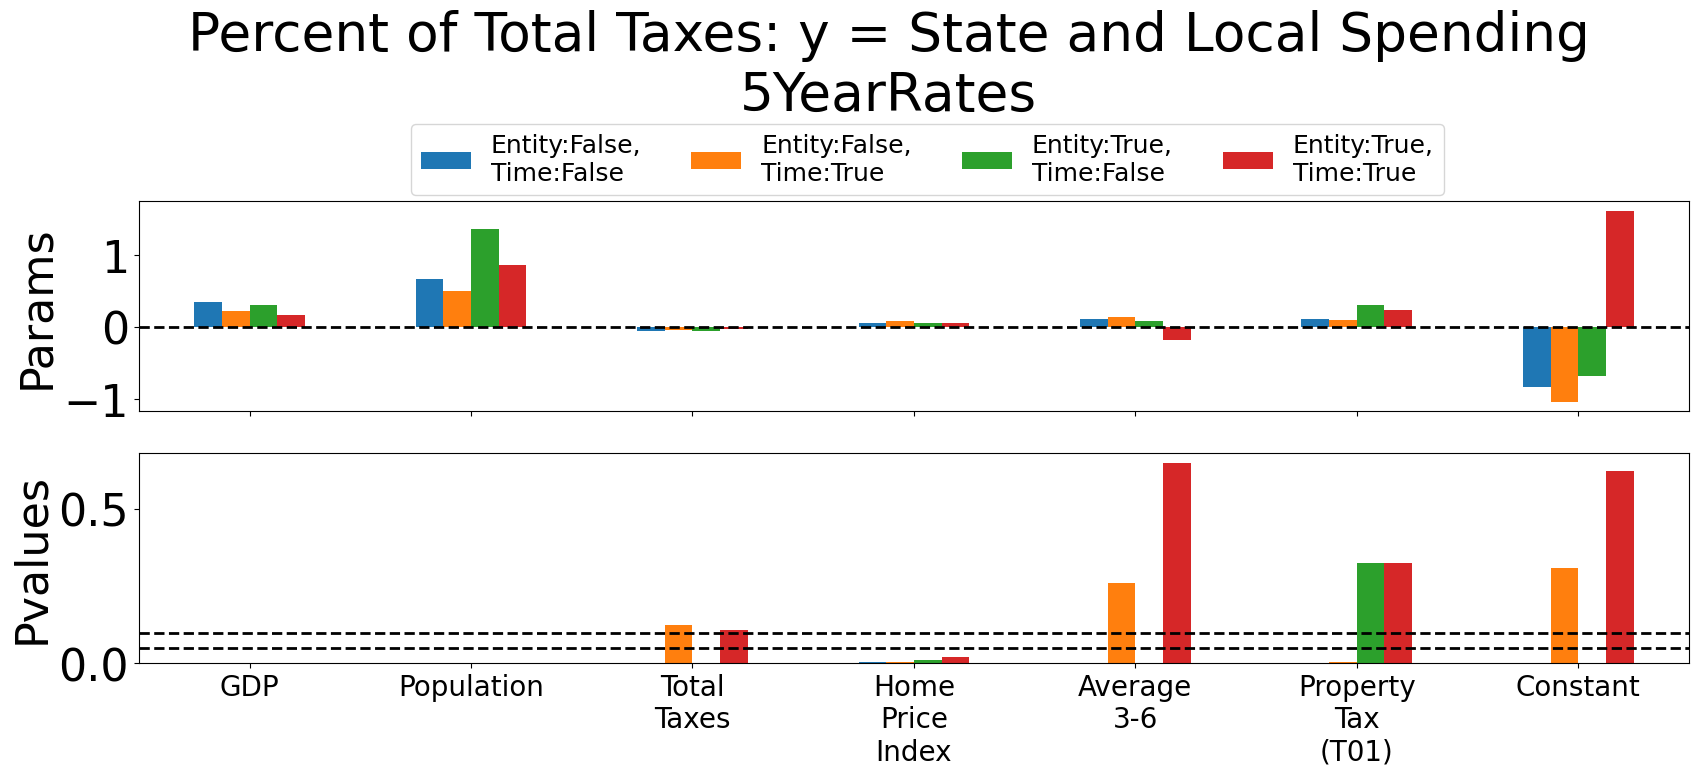

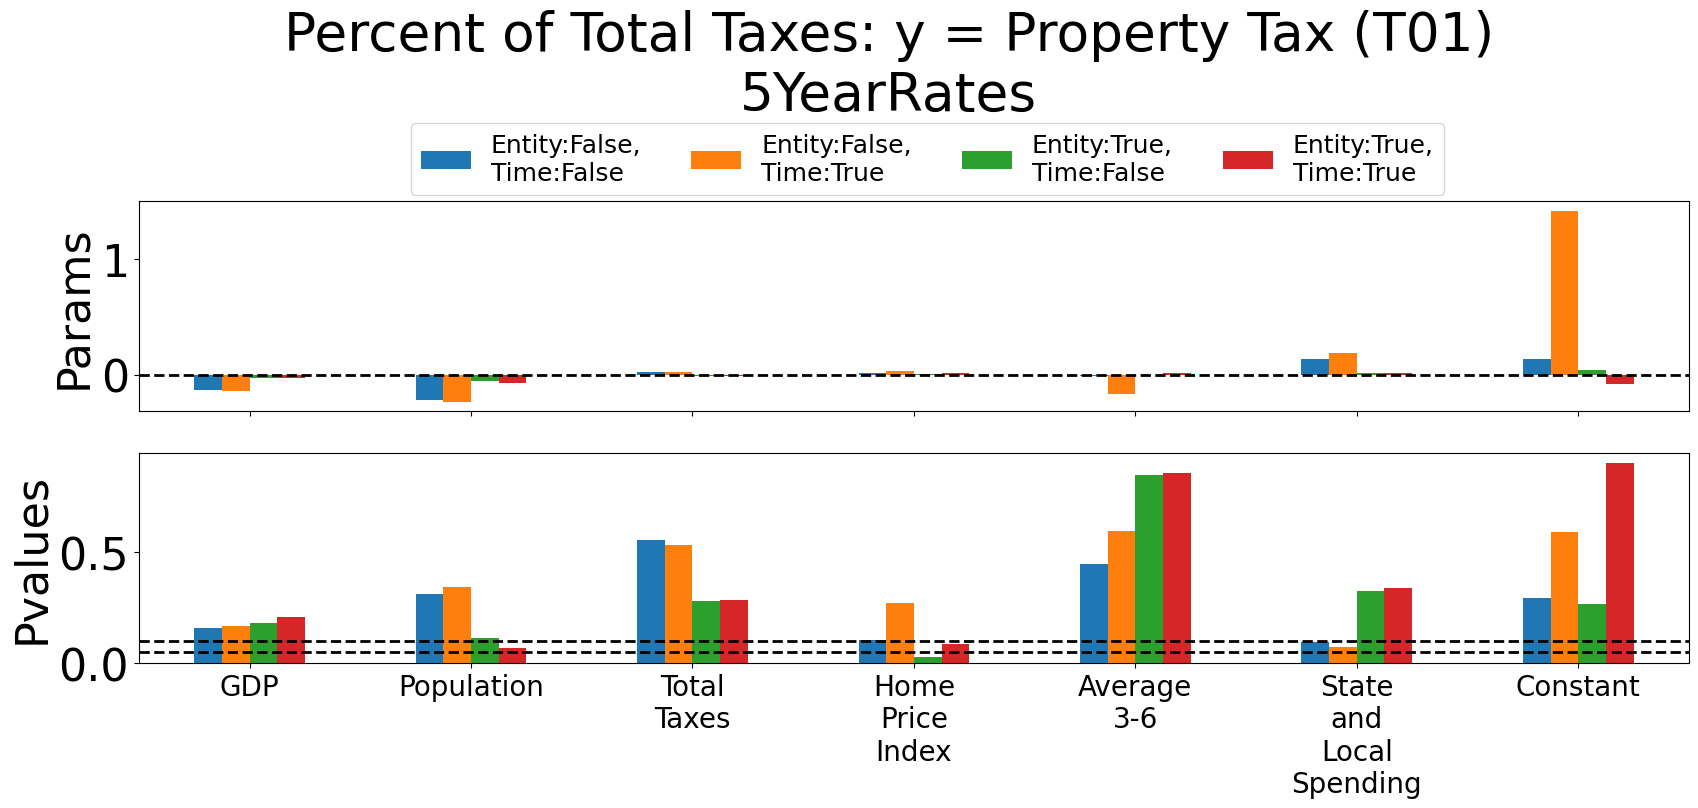

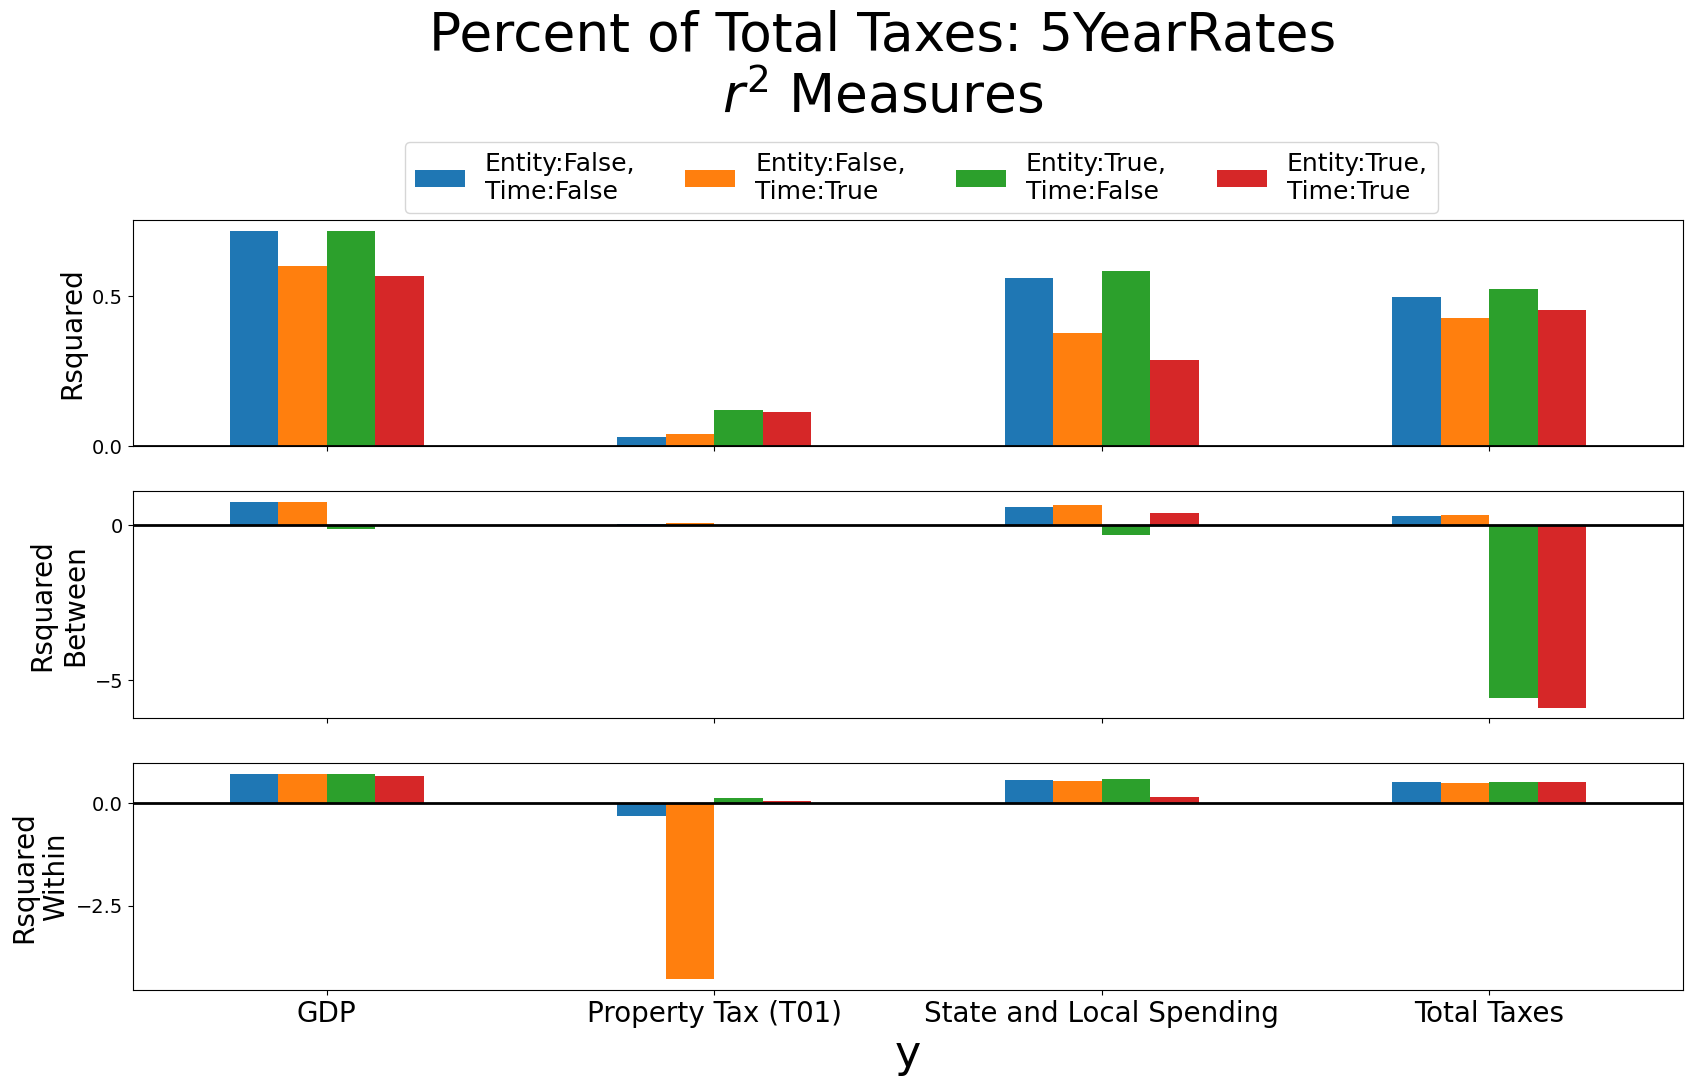

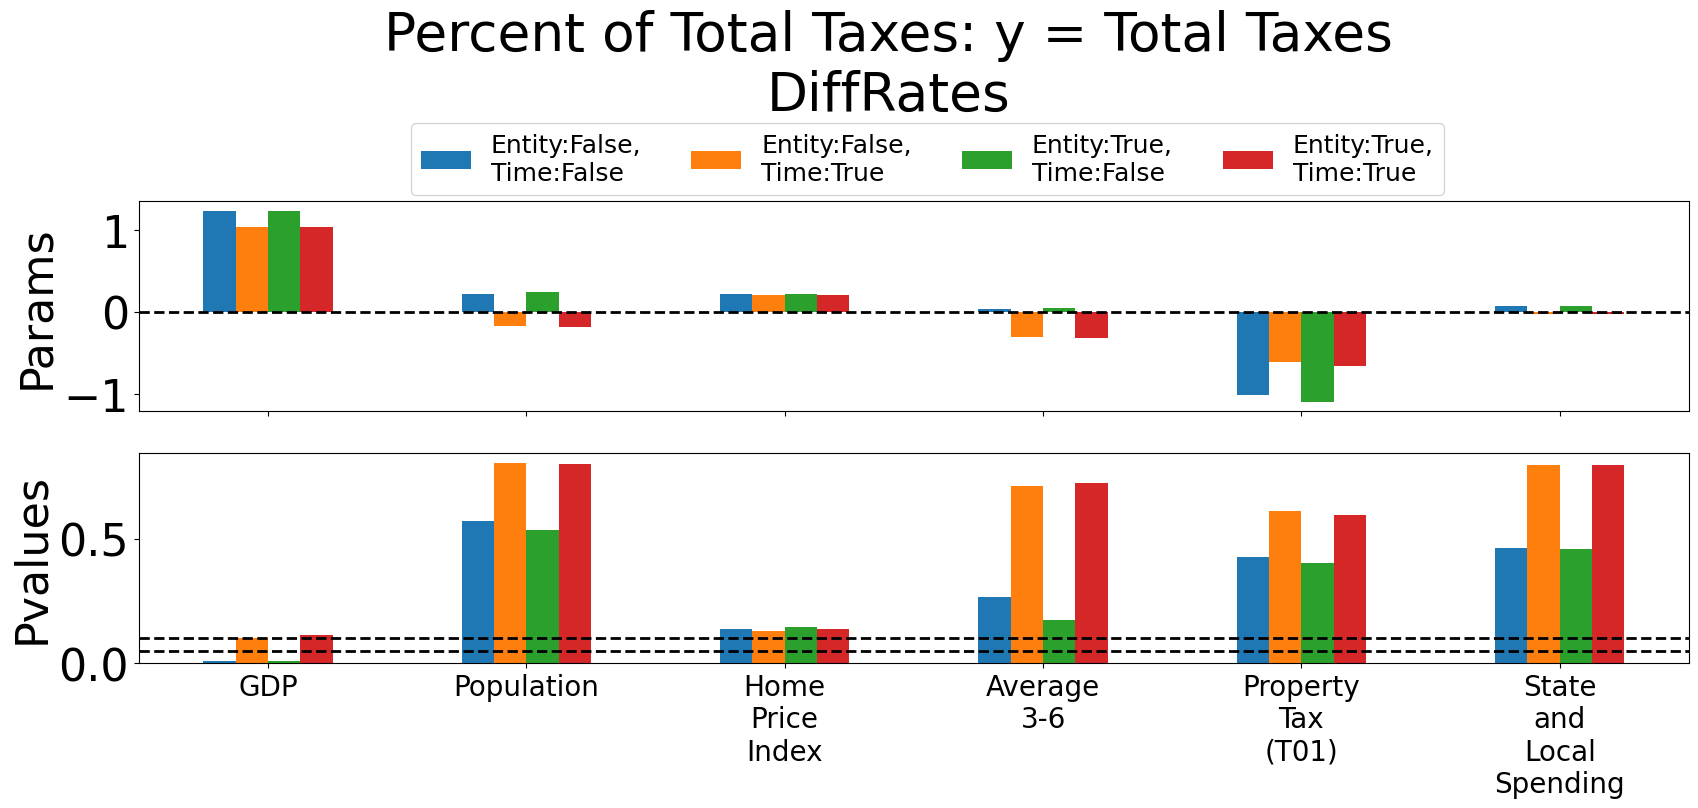

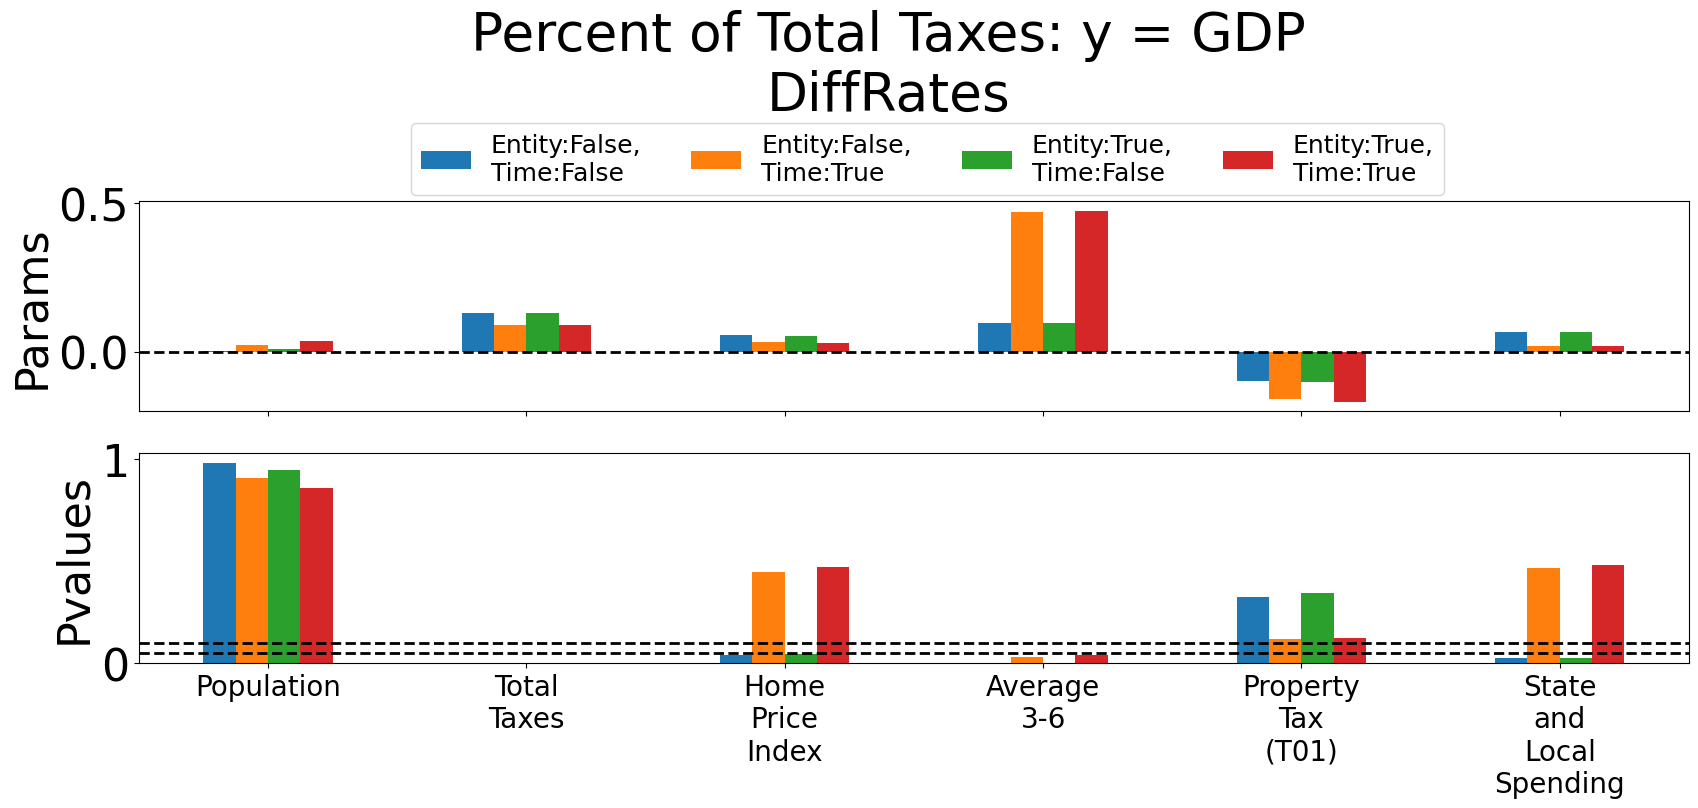

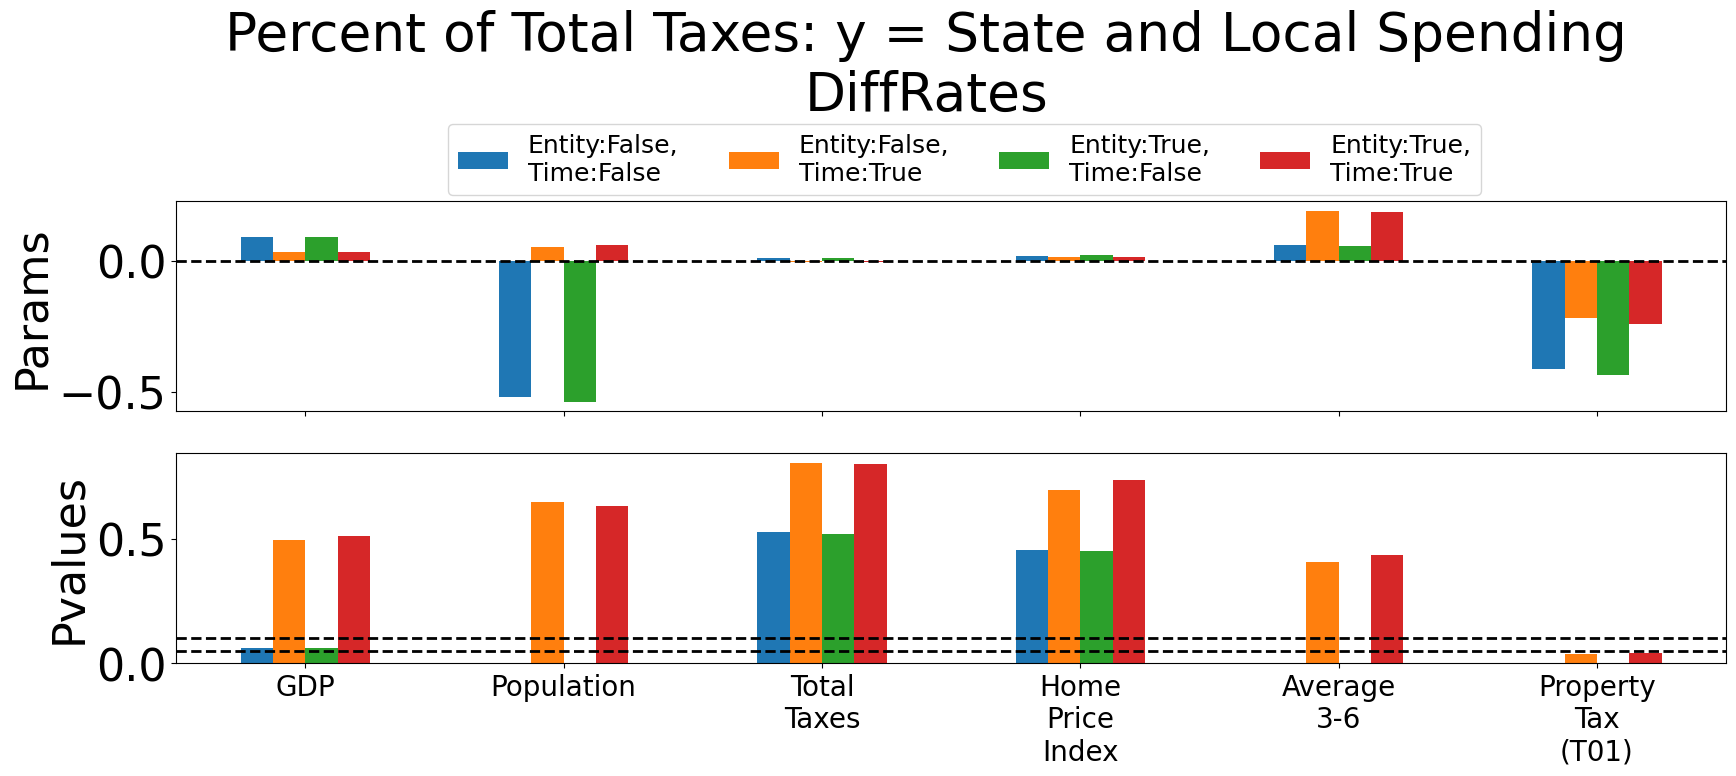

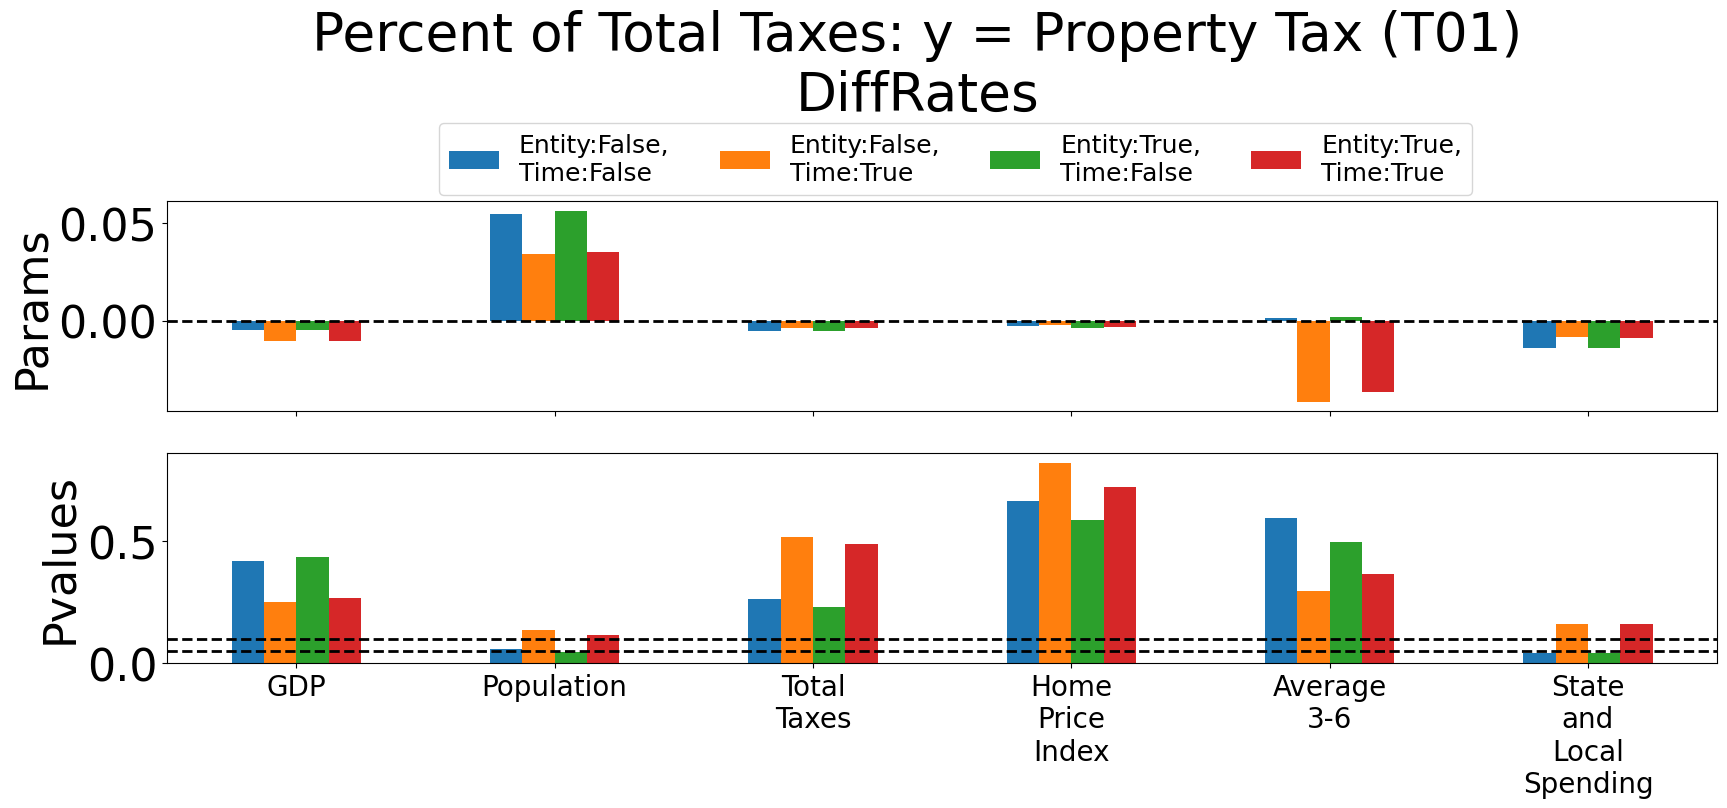

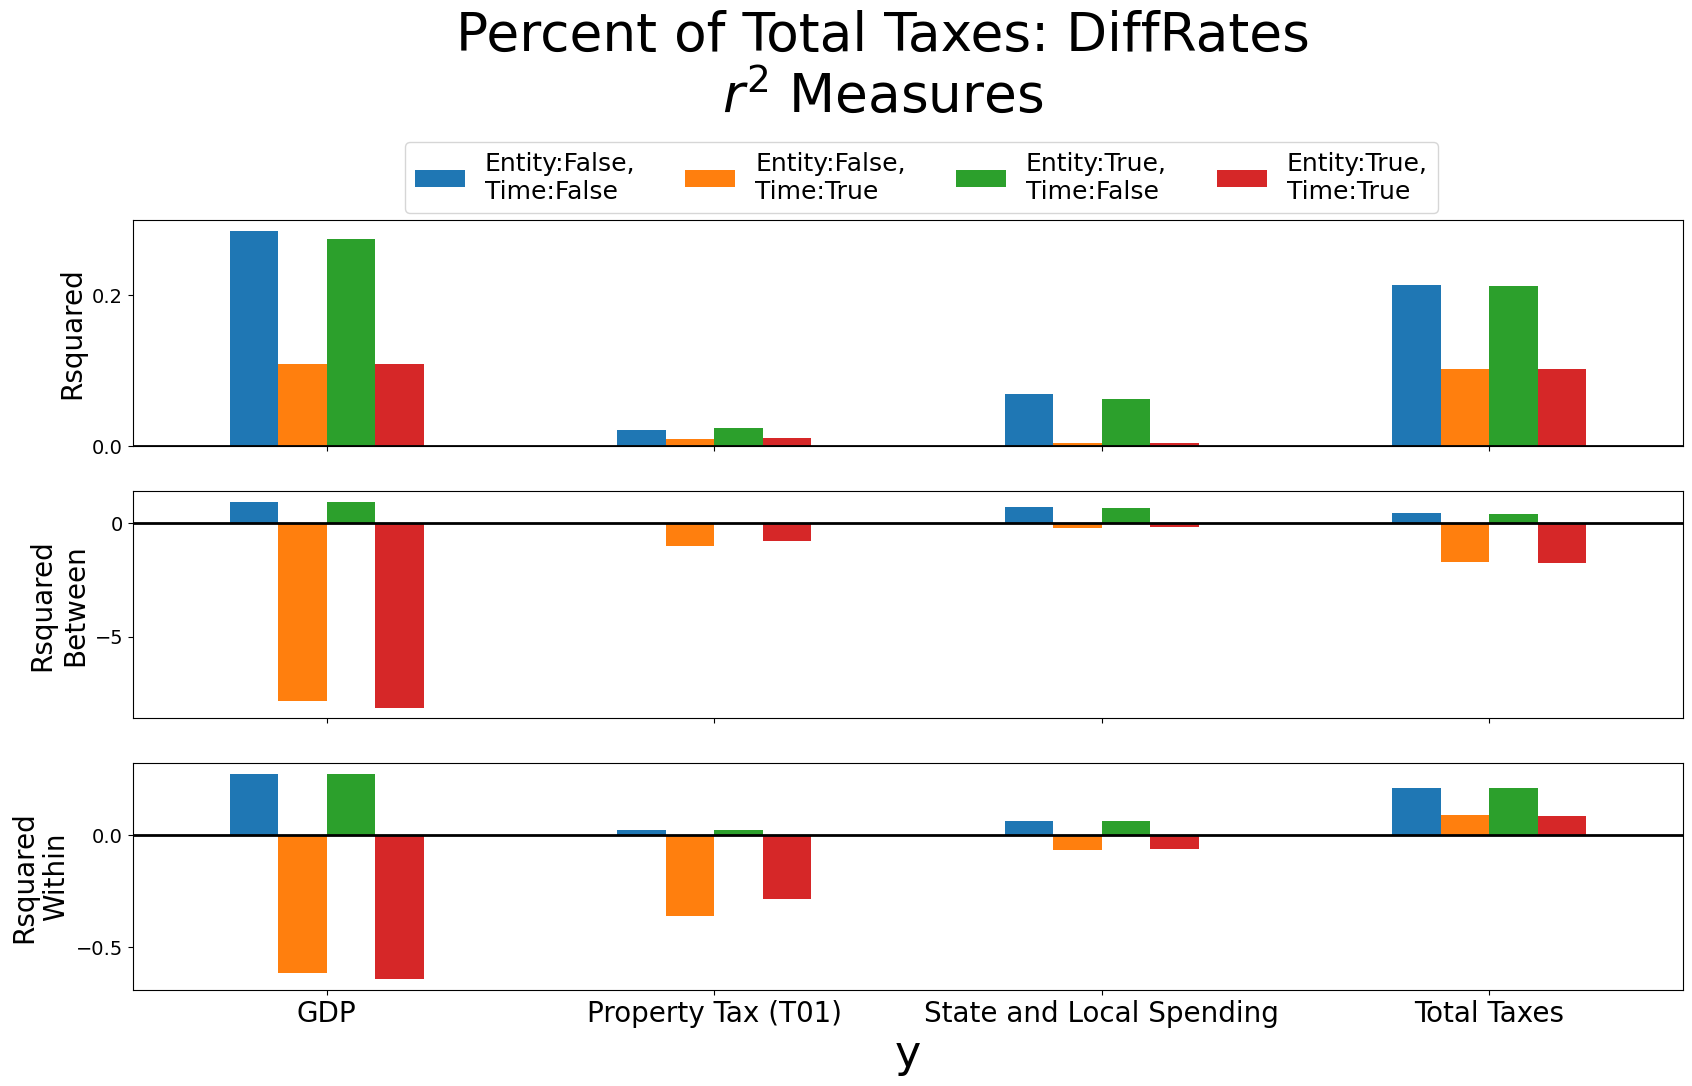

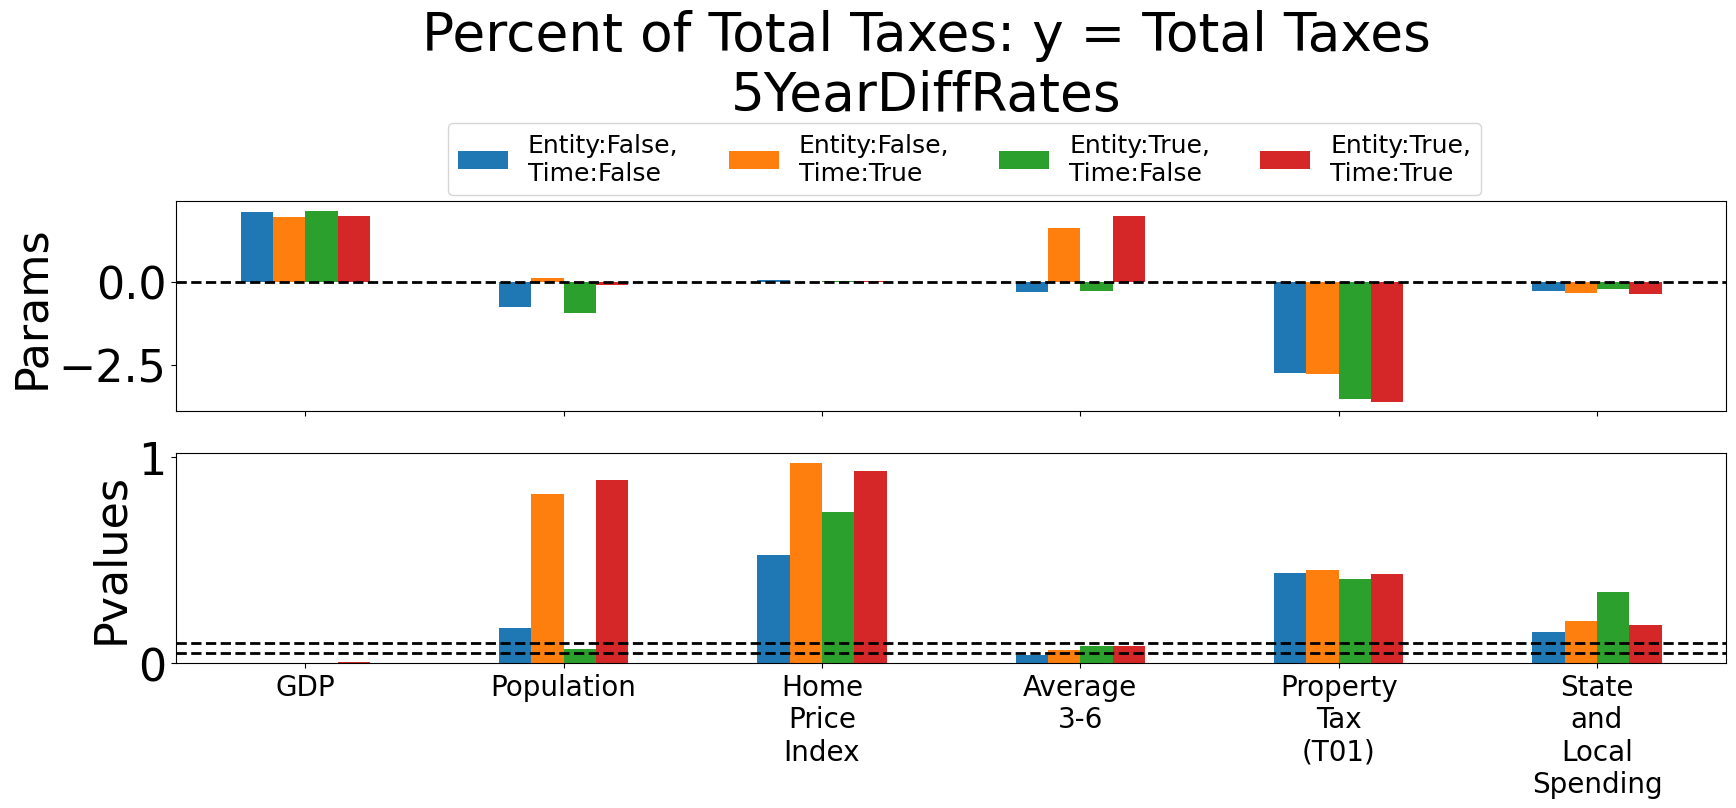

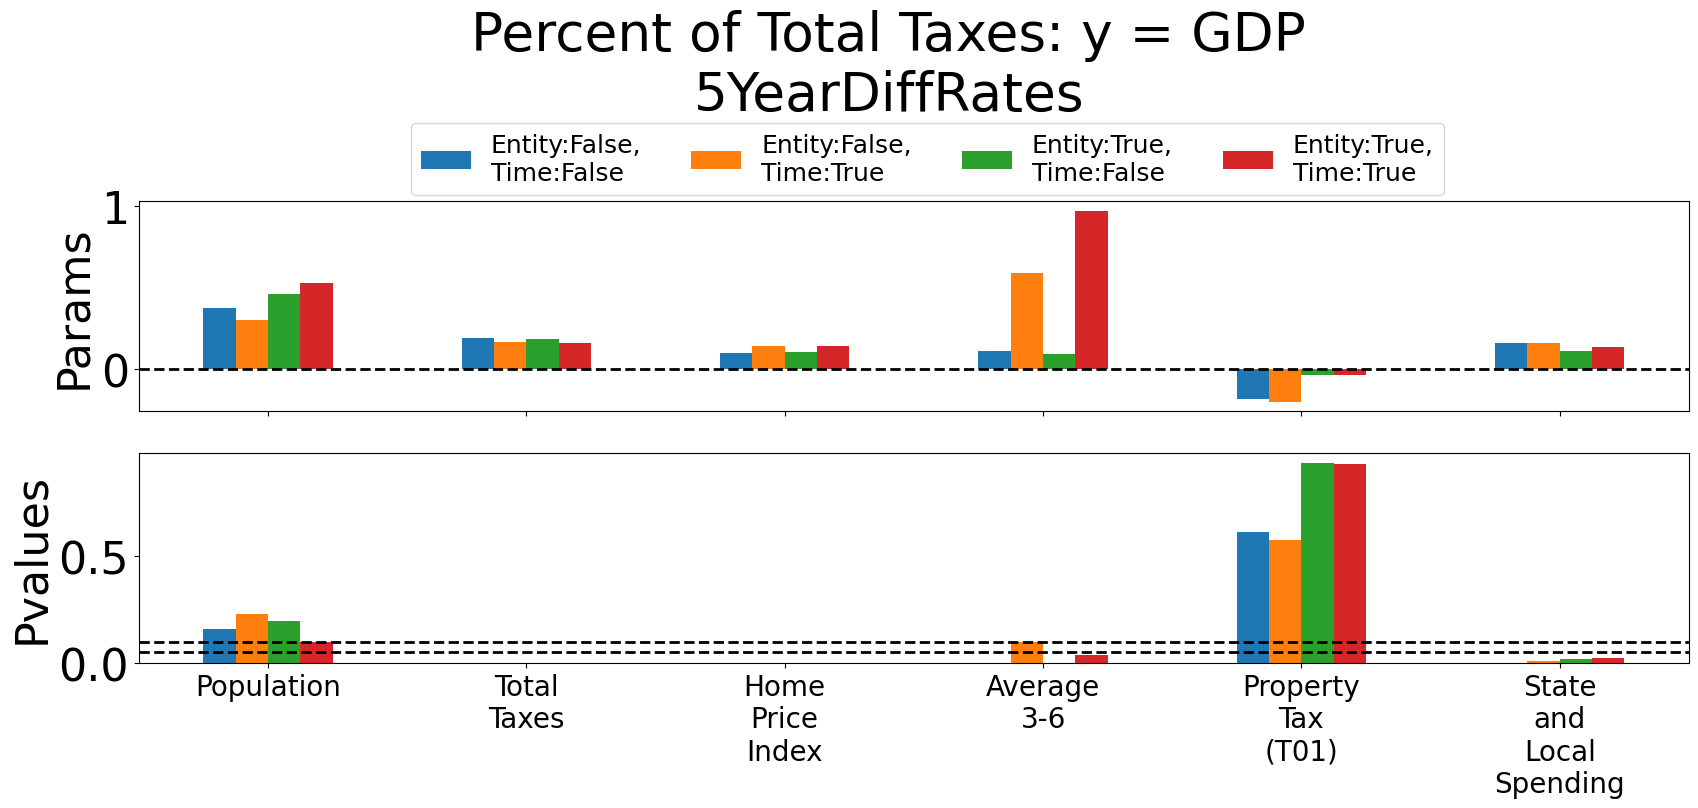

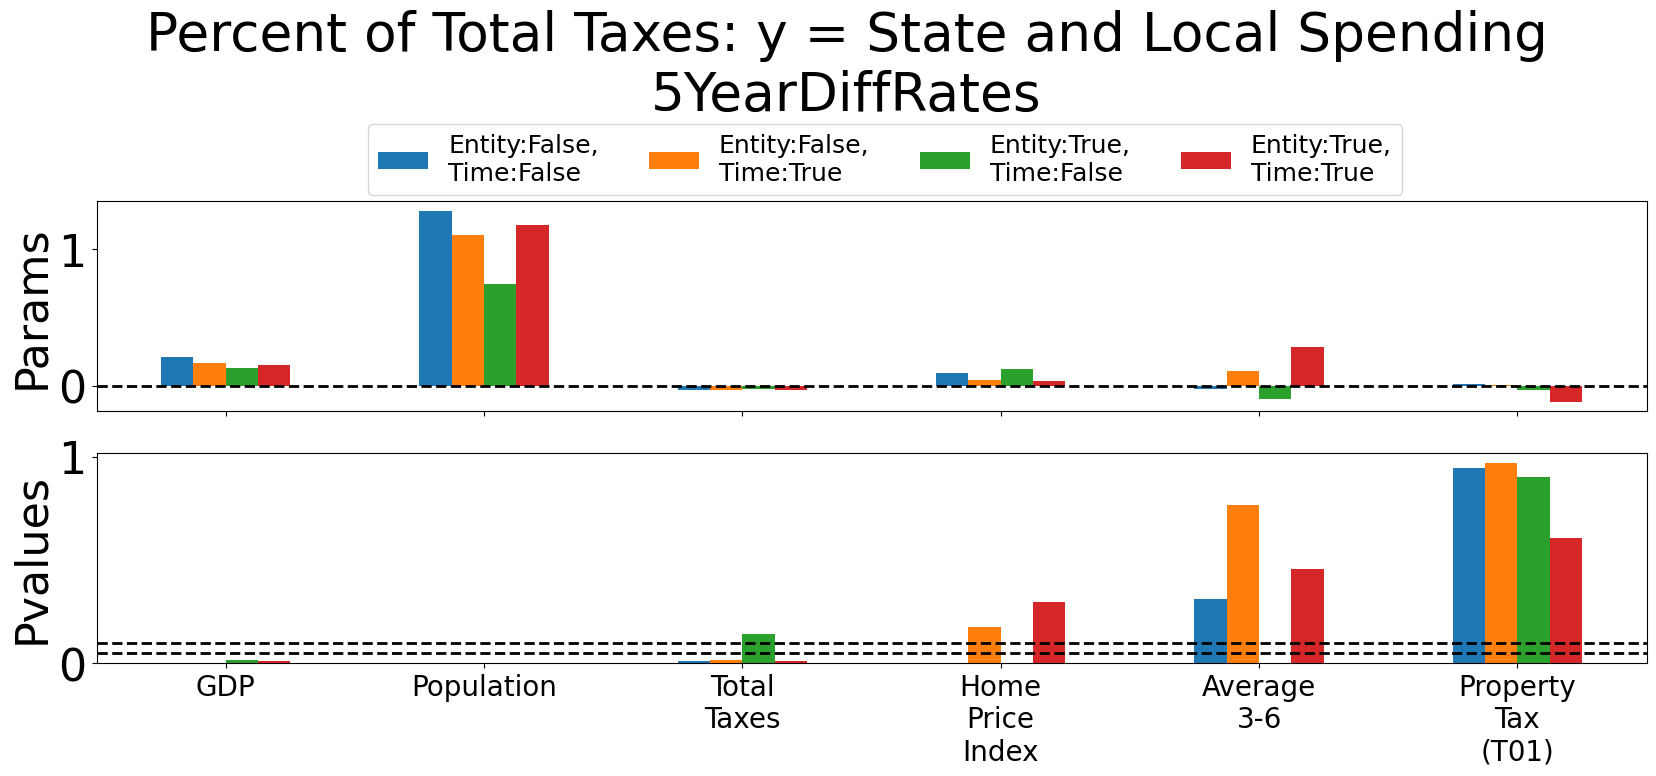

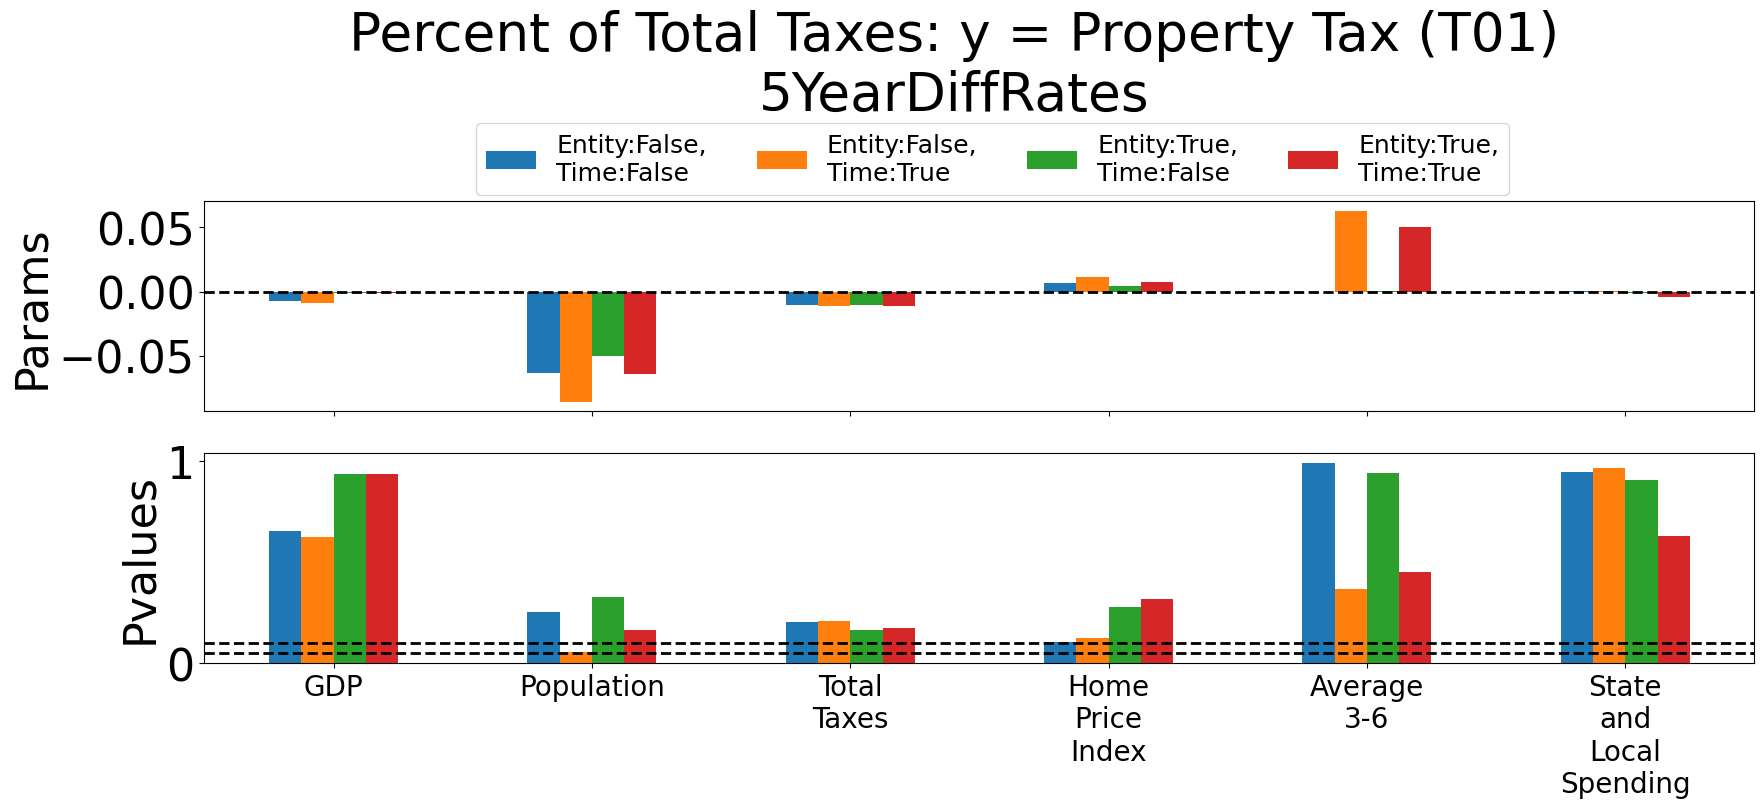

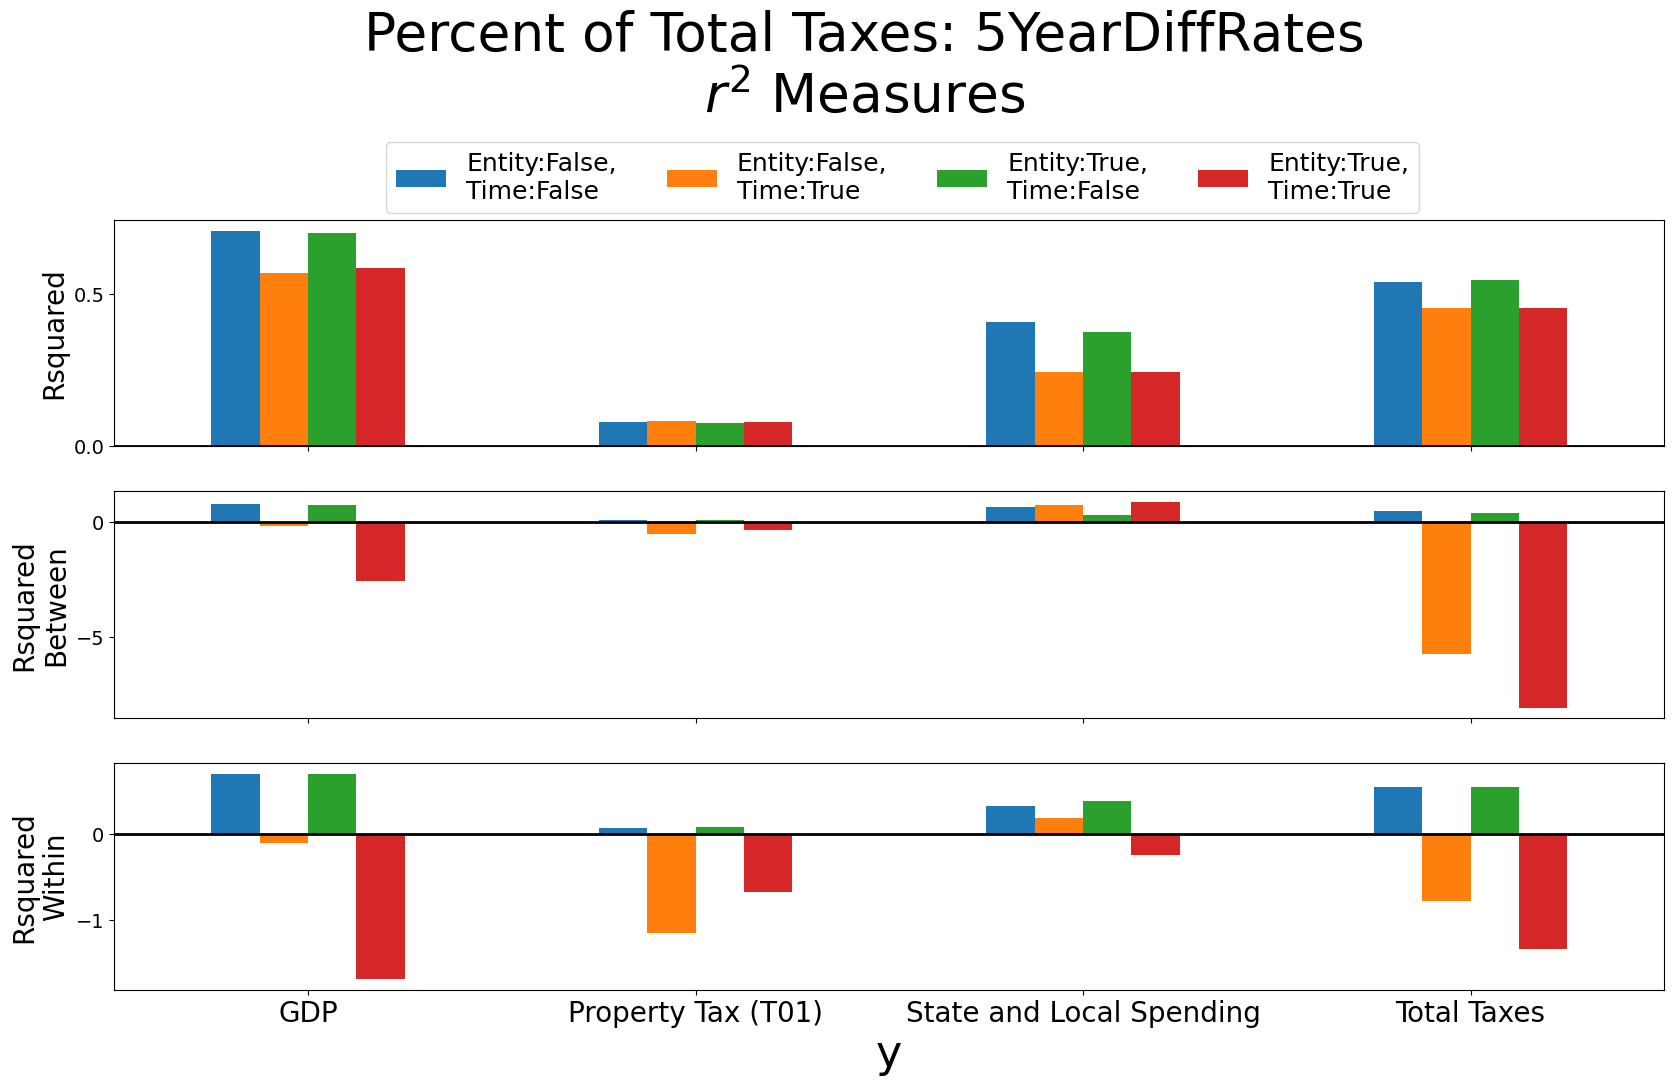

In [26]:
r2_dict = {}
results_dict = {}
beta_dict = {}
pval_dict = {}

reg_vars = ["GDP", "Population", "Total Taxes", "Home Price Index",
            "Average 3-6", "Property Tax (T01)", "State and Local Spending"]
ic = info_criterion()
# possible to include tax component levels instead of component by percent of total taxes; 
#  results of logged components in the least not meaningful without level info
for variant, dct in list(dfs_dct.items())[:1]:
    for key, df in list(dct.items())[2:]:
        results_dict[key] = {}
        r2_dict[key] = {}
        beta_dict[key] = {}
        pval_dict[key] = {}
        # fig, ax = plt.subplots(2,2, figsize = (20,20))
        for y_name in ["Total Taxes", "GDP", "State and Local Spending", "Property Tax (T01)"]:
            r2_dict[key][y_name] = {}
            results_dict[key][y_name] = {}
            beta_dict[key][y_name] = {}
            pval_dict[key][y_name] = {}
            X_names = [name for name in reg_vars if name != y_name]
            for i, entity in enumerate([False, True]):
                for j, time in enumerate([False, True]):
                    beta_dict[key][y_name] = {}
                    pval_dict[key][y_name] = {}
                    reg_data = df[reg_vars].dropna()
                    Y = reg_data[[y_name]]
                    X = reg_data[X_names]
                    if "Diff" not in key:
                        X["Constant"] = 1
                    n = reg_data.shape[1]
                    k = len(X)
                    # call panel_regression method
                    model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
                    # print(f"Data: {key} y={y_name}\n Entity: {entity}\nTime: {time}")
                    results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"]  = model.fit(cov_type='clustered', cluster_entity=True)
                    results = results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"]
                    r2_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = {}
                    r2s = ('rsquared', 'rsquared_between', 'rsquared_within')
                    for r2 in r2s:
                        r2_dict[key][y_name][f"Entity:{entity},\nTime:{time}"][r2] = getattr(results, r2)
                    # print(results)
            print(f"{variant}: {key}\n",y_name)
            compare_regs = compare(results_dict[key][y_name])
            print(compare_regs)
            compare_regs_plot(compare_regs, y_name, variant = variant, title = f"y = {y_name}\n{key}")
        # for r2 in r2s:
        #     print(r2df)
        #     r2_index = r2df.loc[r2] >0
    
        #     r2df = r2df[r2df.loc[r2] >0]
        # Convert the dictionary to a list of tuples
        data_tuples = [(outer_key, inner_key, k, v) for outer_key, inner_dict in r2_dict[key].items() for inner_key, inner_inner_dict in inner_dict.items() for k, v in inner_inner_dict.items()]
        
        # Convert the list of tuples to a pandas DataFrame
        r2_df = pd.DataFrame(data_tuples, columns=[ 'y', 'Effects', 'r2',  'Value']).sort_values(["r2", "y"])
        
        # Set the multi-level index
        r2_df = r2_df.pivot(index = ["r2", "y"], columns = "Effects", values = "Value").reset_index()
        plot_r2(r2_df, r2s, key,variant)

In [28]:
# for key, ys in results_dict.items():
#     for y, fe in ys.items():
#         print(f"{key}\n",y)
#         compare_regs = compare(fe)
#         print(compare_regs)
#         compare_regs_plot(compare_regs, y, title = f"y = {y}\n{key}")

In [29]:
# ## remove results with negative between or within r2 values
# remove_neg_results = {}
# for key, dct in results_df.items():
#     results_df = pd.DataFrame(dct).round(2).T
#     print(key)
#     neg_result = results_df<0 
#     keep_index = [ix for ix in neg_result.index if True not in neg_result.loc[ix].valuefontsize = 2s]
#     remove_neg_results[key] = results_df.loc[keep_index].T
# # pd.DataFrame(results_dct)